# Problem Statement

Schuster is a multinational retail company dealing in sports goods and accessories. Schuster conducts significant business with hundreds of its vendors, with whom it has credit arrangements. Unfortunately, not all vendors respect credit terms and some of them tend to make payments late. Schuster levies heavy late payment fees, although this procedure is not beneficial to either party in a long-term business relationship. The company has some employees who keep chasing vendors to get the payment on time; this procedure nevertheless also results in non-value-added activities, loss of time and financial impact. Schuster would thus try to understand its customers’ payment behaviour and predict the likelihood of late payments against open invoices.

# Objectives 

1. Schuster would like to better understand the customers’ payment behaviour based on their past payment patterns (customer segmentation).
2. Using historical information, it wants to be able to predict the likelihood of delayed payment against open invoices from its customers.
3. It wants to use this information so that collectors can prioritise their work in following up with customers beforehand to get the payments on time.

In [4]:
# Importing required lbraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings 
warnings.filterwarnings('ignore')


# RECEIVED PAYMENT DATA

### Step 1: Reading and Understanding the data

In [7]:
# Reading the dataset
repay_data = pd.read_csv('Received_Payments_Data.csv')
repay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DOC_NO,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,1.421000e+10,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,9.921000e+10,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [8]:
# Checking the shape of the data
repay_data.shape

(93937, 16)

In [9]:
repay_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   RECEIPT_METHOD         93937 non-null  object 
 1   CUSTOMER_NAME          93937 non-null  object 
 2   CUSTOMER_NUMBER        93937 non-null  int64  
 3   RECEIPT_DOC_NO         93908 non-null  float64
 4   RECEIPT_DATE           93937 non-null  object 
 5   CLASS                  93937 non-null  object 
 6   CURRENCY_CODE          93937 non-null  object 
 7   Local Amount           93937 non-null  float64
 8   USD Amount             93937 non-null  float64
 9   INVOICE_ALLOCATED      93937 non-null  object 
 10  INVOICE_CREATION_DATE  93937 non-null  object 
 11  DUE_DATE               93937 non-null  object 
 12  PAYMENT_TERM           93937 non-null  object 
 13  INVOICE_CLASS          93937 non-null  object 
 14  INVOICE_CURRENCY_CODE  93937 non-null  object 
 15  IN

In [10]:
# Checking the distribution of data
repay_data.describe()

,CUSTOMER_NUMBER,RECEIPT_DOC_NO,Local Amount,USD Amount
count,93937.000000,9.390800e+04,9.393700e+04,9.393700e+04
mean,12753.874033,1.583908e+11,1.066470e+06,5.312013e+05
std,14274.170829,3.885359e+10,1.546901e+06,9.508693e+05
min,1044.000000,1.421000e+10,0.000000e+00,0.000000e+00
25%,1888.000000,1.470000e+11,8.198039e+04,3.766298e+04
50%,4003.000000,1.510000e+11,4.053438e+05,1.810010e+05
75%,20884.000000,1.690000e+11,1.425606e+06,5.996137e+05
max,52940.000000,2.970000e+11,1.084983e+07,1.084983e+07


In [11]:
# checking number of unique values in each column
repay_data.nunique()

RECEIPT_METHOD               8
CUSTOMER_NAME              690
CUSTOMER_NUMBER           1054
RECEIPT_DOC_NO              73
RECEIPT_DATE               170
CLASS                        1
CURRENCY_CODE                8
Local Amount              7752
USD Amount                7820
INVOICE_ALLOCATED        12986
INVOICE_CREATION_DATE     1310
DUE_DATE                  1203
PAYMENT_TERM                42
INVOICE_CLASS                3
INVOICE_CURRENCY_CODE       10
INVOICE_TYPE                 2
dtype: int64

In [12]:
# Checking Null counts
repay_data.isnull().sum()

RECEIPT_METHOD            0
CUSTOMER_NAME             0
CUSTOMER_NUMBER           0
RECEIPT_DOC_NO           29
RECEIPT_DATE              0
CLASS                     0
CURRENCY_CODE             0
Local Amount              0
USD Amount                0
INVOICE_ALLOCATED         0
INVOICE_CREATION_DATE     0
DUE_DATE                  0
PAYMENT_TERM              0
INVOICE_CLASS             0
INVOICE_CURRENCY_CODE     0
INVOICE_TYPE              0
dtype: int64

 Only "RECEIPT_DOC_NO" col has 29 null values. Dropping the columns as it is not that much relevant for model building.

In [14]:
# Dropping the "RECEIPT_DOC_NO" column
repay_data.drop('RECEIPT_DOC_NO', axis=1, inplace=True)

# Checking the head of data again
repay_data.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE
0,WIRE,C EA Corp,37403,20-Apr-21,PMT,USD,370990.92,101018.63040,14200000001,2-Nov-20,30-Dec-20,30 Days from EOM,INV,AED,Non Goods
1,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,183750.00,48990.21133,99200000043,29-Dec-20,28-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
2,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99210000003,30-Jan-21,1-Mar-21,30 Days from Inv Date,INV,SAR,Non Goods
3,WIRE,FARO Corp,1409,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000038,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods
4,WIRE,RADW Corp,4003,31-Jan-21,PMT,SAR,157500.00,41991.60971,99200000039,15-Dec-20,14-Jan-21,30 Days from Inv Date,INV,SAR,Non Goods


In [15]:
# Converting the date related columns to datetime

repay_data['RECEIPT_DATE'] = pd.to_datetime(repay_data['RECEIPT_DATE'])
repay_data['INVOICE_CREATION_DATE'] = pd.to_datetime(repay_data['INVOICE_CREATION_DATE'])
repay_data['DUE_DATE'] = pd.to_datetime(repay_data['DUE_DATE'])

In [16]:
# checking the data again 
repay_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93937 entries, 0 to 93936
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93937 non-null  object        
 1   CUSTOMER_NAME          93937 non-null  object        
 2   CUSTOMER_NUMBER        93937 non-null  int64         
 3   RECEIPT_DATE           93937 non-null  datetime64[ns]
 4   CLASS                  93937 non-null  object        
 5   CURRENCY_CODE          93937 non-null  object        
 6   Local Amount           93937 non-null  float64       
 7   USD Amount             93937 non-null  float64       
 8   INVOICE_ALLOCATED      93937 non-null  object        
 9   INVOICE_CREATION_DATE  93937 non-null  datetime64[ns]
 10  DUE_DATE               93937 non-null  datetime64[ns]
 11  PAYMENT_TERM           93937 non-null  object        
 12  INVOICE_CLASS          93937 non-null  object        
 13  I

The date related columns are now converted to datetime datatype

### New target column 'late_pay' is to be created to capture the late bill payment.

In [19]:
# Comparing "RECEIPT_DATE" two columns and "DUE_DATE"Using boolean values and converting them into integer to create the target column 'late_pay'
repay_data['late_pay'] = (repay_data["RECEIPT_DATE"] > repay_data["DUE_DATE"]).astype(int)

In [20]:
repay_data.head(5)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,late_pay
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1


###  Exploratory Data Analysis (EDA)

In [22]:
repay_data.head(10)

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,late_pay
0,WIRE,C EA Corp,37403,2021-04-20,PMT,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,30 Days from EOM,INV,AED,Non Goods,1
1,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
2,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
3,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
4,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
5,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000040,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
6,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000043,2020-12-29,2021-01-28,30 Days from Inv Date,INV,SAR,Non Goods,1
7,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0
8,WIRE,FARO Corp,1409,2021-01-31,PMT,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,30 Days from Inv Date,INV,SAR,Non Goods,1
9,WIRE,RADW Corp,4003,2021-01-31,PMT,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,30 Days from Inv Date,INV,SAR,Non Goods,0


In [23]:
# Defining Categorical Columns of the dataset
cat_col= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE',
           'RECEIPT_METHOD']

# Defining Numerical Columns of the dataset
num_col= ['Local Amount', 'USD Amount']

#### Univmariate Analysis

##### Analysis on Numeric columns

In [26]:
# First Analysing "USD Amount" column
repay_data['USD Amount'].describe()

count    9.393700e+04
mean     5.312013e+05
std      9.508693e+05
min      0.000000e+00
25%      3.766298e+04
50%      1.810010e+05
75%      5.996137e+05
max      1.084983e+07
Name: USD Amount, dtype: float64

In [27]:
# Rounding off the values above
repay_data['USD Amount'].describe().round()

count       93937.0
mean       531201.0
std        950869.0
min             0.0
25%         37663.0
50%        181001.0
75%        599614.0
max      10849829.0
Name: USD Amount, dtype: float64

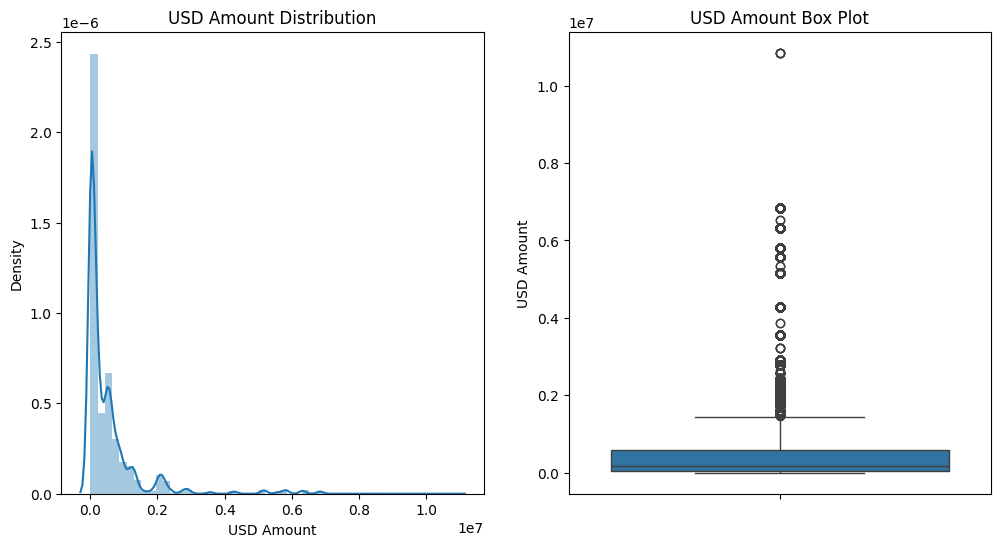

In [28]:
# Visualizing the distribution of 'USD Amount' column

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(repay_data['USD Amount'])
plt.title("USD Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(repay_data['USD Amount'])
plt.title("USD Amount Box Plot")

plt.show()

In [29]:
# Next, analysing the'Local Amount' column 
repay_data['Local Amount'].describe()

count    9.393700e+04
mean     1.066470e+06
std      1.546901e+06
min      0.000000e+00
25%      8.198039e+04
50%      4.053438e+05
75%      1.425606e+06
max      1.084983e+07
Name: Local Amount, dtype: float64

In [30]:
# Rounding off the values above 
repay_data['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

In [31]:
# We see minimum value is 0, checking how many bills have amount as 0
repay_data[repay_data['Local Amount'] == 0].shape

(1126, 16)

In [32]:
# Checking the summary of 'Local Amount' column again
repay_data['Local Amount'].describe().round()

count       93937.0
mean      1066470.0
std       1546901.0
min             0.0
25%         81980.0
50%        405344.0
75%       1425606.0
max      10849829.0
Name: Local Amount, dtype: float64

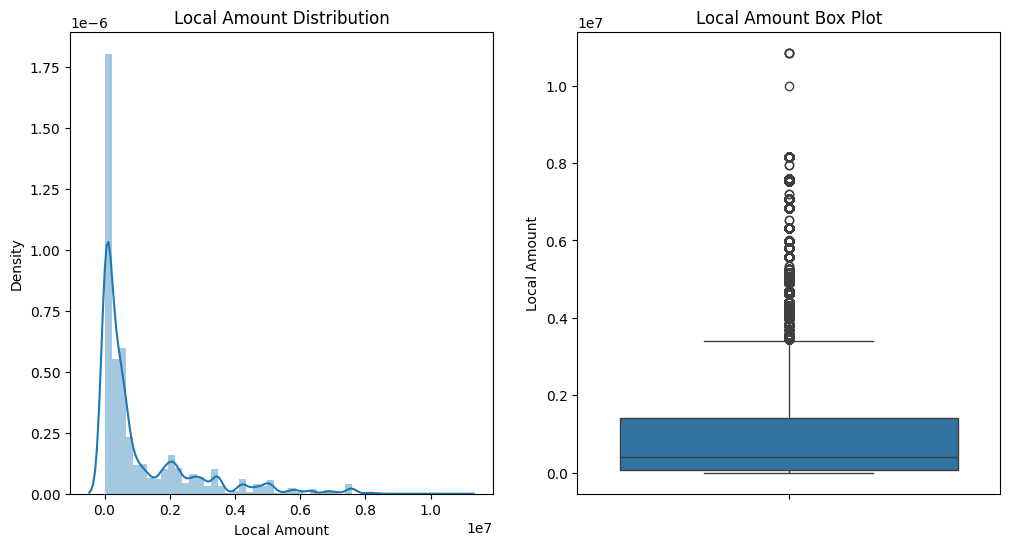

In [33]:
# Visualizing the distribution of 'Local Amount' column
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.distplot(repay_data['Local Amount'])
plt.title("Local Amount Distribution")

plt.subplot(1,2,2)
sns.boxplot(repay_data['Local Amount'])
plt.title("Local Amount Box Plot")

plt.show()

In [34]:
# Checking Where Local and USD Values are same 
repay_data[repay_data['Local Amount']==repay_data['USD Amount']]

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,late_pay
48,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
49,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
50,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
51,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
52,WIRE,MAC Corp,1385,2021-01-19,PMT,AED,49005.48,49005.48,1.0019E+11,2019-09-26,2019-10-26,30 Days from Inv Date,INV,USD,Non Goods,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93932,WIRE,PEAR Corp,21144,2021-04-01,PMT,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,1
93933,WIRE,PEAR Corp,21144,2021-04-01,PMT,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,1
93934,WIRE,PEAR Corp,21144,2021-04-01,PMT,USD,59914.50,59914.50,2.842E+11,2020-12-28,2020-12-28,Immediate,CM,USD,Goods,1
93935,WIRE,NAMS Corp,21145,2021-04-01,PMT,AED,23574.33,23574.33,2.842E+11,2021-01-24,2021-03-24,60 Days from Inv Date,INV,AED,Goods,1


There are 41624 rows where Local Amount is equal to USD Amount

In [36]:
# Checking where Currency Code is not USD
repay_data[repay_data['Local Amount']==repay_data['USD Amount']][repay_data['CURRENCY_CODE']!='USD']


,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,late_pay
48,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
49,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
50,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
51,WIRE,ALLI Corp,7530,2021-01-13,PMT,AED,6448.74,6448.74,1.002E+11,2020-12-23,2021-01-30,30 Days from EOM,INV,AED,Non Goods,0
52,WIRE,MAC Corp,1385,2021-01-19,PMT,AED,49005.48,49005.48,1.0019E+11,2019-09-26,2019-10-26,30 Days from Inv Date,INV,USD,Non Goods,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93909,WIRE,NAMS Corp,21145,2021-04-01,PMT,AED,23574.33,23574.33,2.842E+11,2021-01-24,2021-03-24,60 Days from Inv Date,INV,AED,Goods,1
93913,WIRE,NAMS Corp,21145,2021-04-07,PMT,AED,4342.99,4342.99,2.842E+11,2021-01-26,2021-03-26,60 Days from Inv Date,INV,AED,Goods,1
93914,WIRE,NAMS Corp,21145,2021-04-07,PMT,AED,4342.99,4342.99,2.842E+11,2021-01-26,2021-03-26,60 Days from Inv Date,INV,AED,Goods,1
93935,WIRE,NAMS Corp,21145,2021-04-01,PMT,AED,23574.33,23574.33,2.842E+11,2021-01-24,2021-03-24,60 Days from Inv Date,INV,AED,Goods,1


We came across 21806 rows where Local Amount is equal to USD Amount and the current is not USD.

In [38]:
# Checking Extreme Values of USA Column
repay_data [repay_data['USD Amount']>10000000]
# for USA amount > 10000000, Local Amount and USD Amount Same.

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CLASS,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,PAYMENT_TERM,INVOICE_CLASS,INVOICE_CURRENCY_CODE,INVOICE_TYPE,late_pay
60057,WIRE,SEPH Corp,2315,2021-02-16,PMT,AED,10849828.8,10849828.8,1.5621E+11,2021-01-03,2021-01-03,Immediate Payment,INV,AED,Non Goods,1
60058,WIRE,SEPH Corp,2315,2021-02-16,PMT,AED,10849828.8,10849828.8,1.5621E+11,2021-02-14,2021-02-14,Immediate Payment,INV,AED,Non Goods,1
60059,WIRE,SEPH Corp,2315,2021-02-16,PMT,AED,10849828.8,10849828.8,1.5621E+11,2021-01-26,2021-01-26,Immediate Payment,INV,AED,Non Goods,1
60060,WIRE,SEPH Corp,2315,2021-02-16,PMT,AED,10849828.8,10849828.8,1.5621E+11,2021-01-12,2021-01-12,Immediate Payment,INV,AED,Non Goods,1


In [39]:
# Checking for Currency Codes other than USD
repay_data[repay_data['Local Amount']==repay_data['USD Amount']][repay_data['CURRENCY_CODE']!='USD']['CURRENCY_CODE'].value_counts()


CURRENCY_CODE
AED    20534
EUR     1365
SAR      727
GBP      130
KWD       10
QAR        2
BHD        1
Name: count, dtype: int64

Top 3 currency in the entries - AED > EUR > GBP

In [41]:
# Checking in which Currency was the Invoice Raised
repay_data[repay_data['Local Amount']==repay_data['USD Amount']][repay_data['CURRENCY_CODE']!='USD']['INVOICE_CURRENCY_CODE'].value_counts()
# There might be a lot Over Lapping.

INVOICE_CURRENCY_CODE
AED    15850
SAR     2890
USD     2250
EUR     1358
KWD      144
GBP      129
BHD      104
JOD       28
QAR       16
Name: count, dtype: int64

##### "Local Amount" column has multiple currencies, hence we will consider the "USD amount" column as the correct invoice amount for the entire data set

##### We checked earlier that there are only 4 entries with USD Amount > 10 million.

In [44]:
# dropping these 4 values with USD Amount > 10 million
dropindex=repay_data[repay_data['USD Amount']>10000000].index

In [45]:
repay_data.drop(dropindex,inplace=True)
repay_data.shape

(93933, 16)

In [46]:
repay_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93933 entries, 0 to 93936
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93933 non-null  object        
 1   CUSTOMER_NAME          93933 non-null  object        
 2   CUSTOMER_NUMBER        93933 non-null  int64         
 3   RECEIPT_DATE           93933 non-null  datetime64[ns]
 4   CLASS                  93933 non-null  object        
 5   CURRENCY_CODE          93933 non-null  object        
 6   Local Amount           93933 non-null  float64       
 7   USD Amount             93933 non-null  float64       
 8   INVOICE_ALLOCATED      93933 non-null  object        
 9   INVOICE_CREATION_DATE  93933 non-null  datetime64[ns]
 10  DUE_DATE               93933 non-null  datetime64[ns]
 11  PAYMENT_TERM           93933 non-null  object        
 12  INVOICE_CLASS          93933 non-null  object        
 13  INVOIC

### Categorical Columns

#### Categorical Columns of the dataset
##### cat_col= ['CUSTOMER_NAME','CLASS','CURRENCY_CODE','PAYMENT_TERM','INVOICE_CLASS','INVOICE_CURRENCY_CODE', 'INVOICE_TYPE', 'RECEIPT_METHOD']

#### CUSTOMER_NAME column

In [50]:
# Finding the number of Unique customer names
repay_data['CUSTOMER_NAME'].nunique()

690

In [51]:
repay_data['CUSTOMER_NAME'].value_counts()

CUSTOMER_NAME
SEPH Corp    23139
FARO Corp    15004
PARF Corp     6624
ALLI Corp     5645
AREE Corp     2224
             ...  
KHAW Corp        1
EYEW Corp        1
BRAV Corp        1
NOUS Corp        1
ESSE Corp        1
Name: count, Length: 690, dtype: int64

In [52]:
repay_data['CUSTOMER_NUMBER'].value_counts().head(10)

CUSTOMER_NUMBER
1409     14698
15768    11052
2315      9712
7530      5382
1888      5062
3274      2215
3926      2133
34870     1480
1044      1371
3997      1288
Name: count, dtype: int64

In [53]:
# Different Lengths So the Company Name has Multiple Customer Numbers
repay_data.groupby(['CUSTOMER_NAME'])['CUSTOMER_NUMBER'].value_counts(ascending=True)

CUSTOMER_NAME  CUSTOMER_NUMBER
3D D Corp      4009               172
6TH  Corp      51440                9
A3 D Corp      23356                5
ABC  Corp      20965                3
ABDU Corp      34219                1
                                 ... 
ZAHR Corp      35012               13
ZAIN Corp      48682               20
               35013               22
ZERO Corp      44781                4
ZV F Corp      42660               11
Name: count, Length: 1054, dtype: int64

In [54]:
repay_data.groupby(['CUSTOMER_NAME','CUSTOMER_NUMBER']).count()

RECEIPT_METHOD  RECEIPT_DATE  CLASS  \
CUSTOMER_NAME CUSTOMER_NUMBER                                        
3D D Corp     4009                        172           172    172   
6TH  Corp     51440                         9             9      9   
A3 D Corp     23356                         5             5      5   
ABC  Corp     20965                         3             3      3   
ABDU Corp     34219                         1             1      1   
...                                       ...           ...    ...   
ZAHR Corp     45445                         1             1      1   
ZAIN Corp     35013                        22            22     22   
              48682                        20            20     20   
ZERO Corp     44781                         4             4      4   
ZV F Corp     42660                        11            11     11   

                               CURRENCY_CODE  Local Amount  USD Amount  \
CUSTOMER_NAME CUSTOMER_NUMBER                                            
3D D Corp     4009                       172           172         172   
6TH  Corp     51440                        9             9           9   
A3 D Corp     23356                        5             5           5   
ABC  Corp     20965                        3             3           3   
ABDU Corp     34219                        1             1           1   
...                                      ...           ...         ...   
ZAHR Corp     45445                        1             1           1   
ZAIN Corp     35013                       22            22          22   
              48682                       20            20          20   
ZERO Corp     44781                        4             4           4   
ZV F Corp     42660                       11            11          11   

                               INVOICE_ALLOCATED  INVOICE_CREATION_DATE  \
CUSTOMER_NAME CUSTOMER_NUMBER                                             
3D D Corp     4009                           172                    172   
6TH  Corp     51440                            9                      9   
A3 D Corp     23356                            5                      5   
ABC  Corp     20965                            3                      3   
ABDU Corp     34219                            1                      1   
...                                          ...                    ...   
ZAHR Corp     45445                            1                      1   
ZAIN Corp     35013                           22                     22   
              48682                           20                     20   
ZERO Corp     44781                            4                      4   
ZV F Corp     42660                           11                     11   

                               DUE_DATE  PAYMENT_TERM  INVOICE_CLASS  \
CUSTOMER_NAME CUSTOMER_NUMBER                                          
3D D Corp     4009                  172           172            172   
6TH  Corp     51440                   9             9              9   
A3 D Corp     23356                   5             5              5   
ABC  Corp     20965                   3             3              3   
ABDU Corp     34219                   1             1              1   
...                                 ...           ...            ...   
ZAHR Corp     45445                   1             1              1   
ZAIN Corp     35013                  22            22             22   
              48682                  20            20             20   
ZERO Corp     44781                   4             4              4   
ZV F Corp     42660                  11            11             11   

                               INVOICE_CURRENCY_CODE  INVOICE_TYPE  late_pay  
CUSTOMER_NAME CUSTOMER_NUMBER                                                 
3D D Corp     4009                               172           172       172  
6TH  Co

#### CLASS column

In [56]:
# Checking the number of unique values in the column
repay_data['CLASS'].nunique()

1

In [57]:
# Dropping the CLASS column as it has only one value
repay_data.drop('CLASS', axis=1, inplace=True)

#### CURRENCY_CODE column

In [59]:
# Checking the number of unique values in the column
repay_data['CURRENCY_CODE'].nunique()

8

In [60]:
# Checking the value counts of each currency code
repay_data['CURRENCY_CODE'].value_counts()

CURRENCY_CODE
SAR    36495
AED    36275
USD    19524
EUR     1438
GBP      130
BHD       59
KWD       10
QAR        2
Name: count, dtype: int64

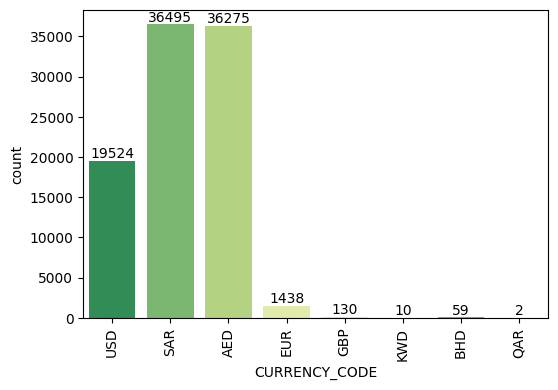

In [61]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=repay_data, x='CURRENCY_CODE', palette='RdYlGn_r')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

Currency used for bill payments are mostly USD, SAR or AED.

#### INVOICE_CLASS column

In [64]:
# Checking the value count of each level of INVOICE_CLASS
repay_data['INVOICE_CLASS'].value_counts()

INVOICE_CLASS
INV    88120
CM      5261
DM       552
Name: count, dtype: int64

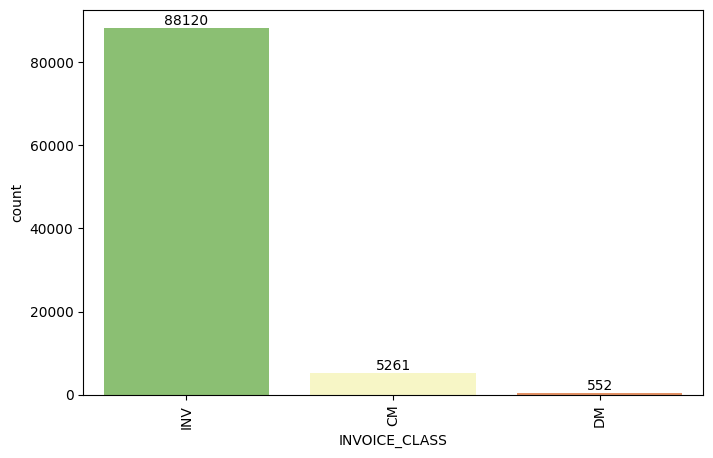

In [65]:
# Visualising the column
plt.figure(figsize=(8,5))
ax = sns.countplot(data=repay_data, x='INVOICE_CLASS', palette='RdYlGn_r')
plt.xticks(rotation= 90)
for label in ax.containers:
    ax.bar_label(label)
plt.show()

INV has the maximum number of bills in INVOICE_CLASS column.

#### INVOICE_CURRENCY_CODE column


In [68]:
# Checking the number of unique values in the column
repay_data['INVOICE_CURRENCY_CODE'].nunique()

10

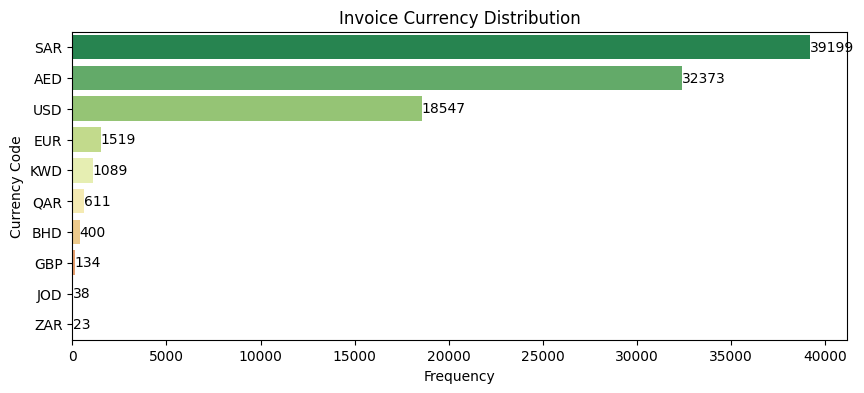

In [69]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=repay_data, y='INVOICE_CURRENCY_CODE', order=repay_data['INVOICE_CURRENCY_CODE'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Invoice Currency Distribution")
plt.ylabel("Currency Code")
plt.xlabel("Frequency")

plt.show()

The most number of invoices were generated in SAR, AED and USD currency.

#### INVOICE_TYPE column

In [72]:
# Checking the value count of each level of INVOICE_TYPE
repay_data['INVOICE_TYPE'].value_counts()

INVOICE_TYPE
Goods        66715
Non Goods    27218
Name: count, dtype: int64

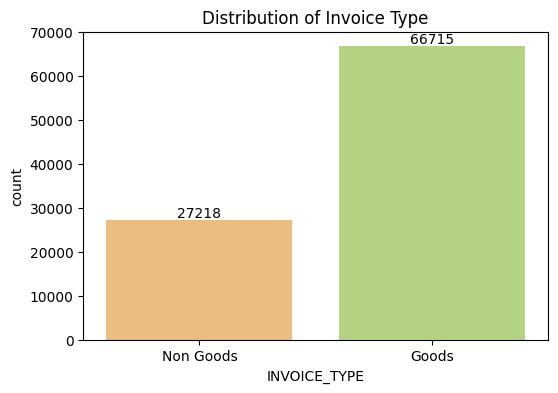

In [73]:
# Visualising the column
plt.figure(figsize=(6,4))
ax = sns.countplot(data=repay_data, x='INVOICE_TYPE', palette='RdYlGn')

for label in ax.containers:
    ax.bar_label(label)

plt.title("Distribution of Invoice Type")
plt.show()

#### RECEIPT_METHOD column

In [75]:
# Checking the value count of each level of RECEIPT_METHOD
repay_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             84403
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

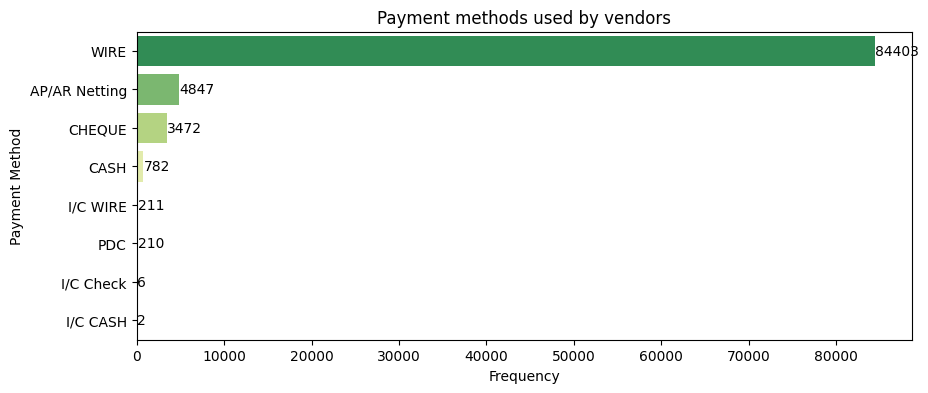

In [76]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=repay_data, y='RECEIPT_METHOD', order=repay_data['RECEIPT_METHOD'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")

plt.show()

#### PAYMENT_TERM column

In [78]:
# Checking the number of unique values in the column
repay_data['PAYMENT_TERM'].nunique()

42

In [79]:
# Checking the list of unique values
repay_data['PAYMENT_TERM'].unique()

array(['30 Days from EOM', '30 Days from Inv Date', '45 Days from EOM',
       'Immediate', '100% Adv Payment', 'Immediate Payment',
       '15 Days from EOM', '25 DAYS FROM EOM', '60 Days from EOM',
       '60 Days from Inv Date', '45 Days from Inv Date',
       '90 Days from Inv Date', '15 Days from Inv Date',
       'Cash on Delivery', '45 DAYS + EOM', '90 Days from EOM',
       'On Consignment', 'EOM', '7 Days from Inv Date',
       '50% ADVANCE PAYMENT AND 50% UPON RECEIVING THE SHIPMENT',
       '75 Days from EOM', 'Standby LC at 30 days',
       '30% advance 70% after 30 days from invoice date', 'LC at 60 days',
       '50% Advance 50% INVDATE+60 DAYS', '120 Days from EOM',
       '75 Days from Inv Date', 'LCSight', '180 DAYS FROM INV DATE',
       'LC at 90 days', '30% advance 70% after 60 days from invoice date',
       'Cash Against Document at sight', 'Advance with discount',
       '50% ADV 50% 30 Days', '120 Days from Inv Date',
       '25% ADVANCE, 75% 30 DAYS FROM INVOIC

In [80]:
# Checking the top 10 PAYMENT_TERM
repay_data['PAYMENT_TERM'].value_counts().head(10)

PAYMENT_TERM
60 Days from Inv Date    19870
30 Days from Inv Date    14672
60 Days from EOM         12518
30 Days from EOM         11306
15 Days from EOM          7544
Immediate Payment         5470
Immediate                 5261
90 Days from EOM          3893
45 Days from Inv Date     3550
45 Days from EOM          3509
Name: count, dtype: int64

#### RECEIPT_METHOD column

In [82]:
# Checking the value count of each level of RECEIPT_METHOD
repay_data['RECEIPT_METHOD'].value_counts()

RECEIPT_METHOD
WIRE             84403
AP/AR Netting     4847
CHEQUE            3472
CASH               782
I/C WIRE           211
PDC                210
I/C Check            6
I/C CASH             2
Name: count, dtype: int64

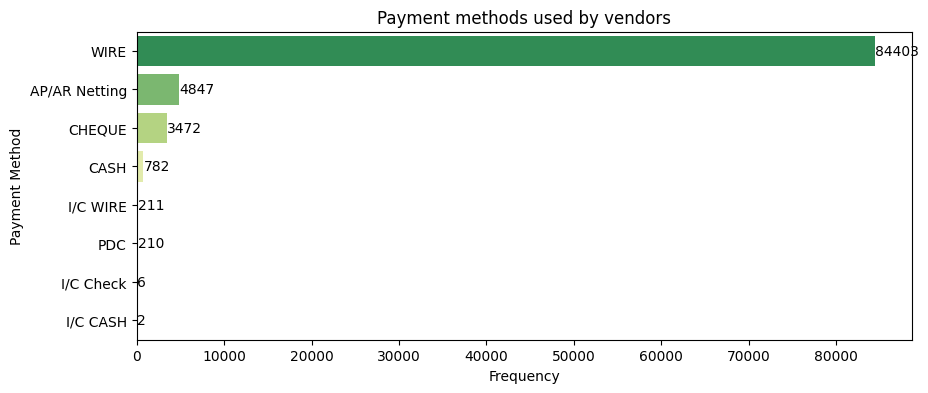

In [83]:
# Visualising the column
plt.figure(figsize=(10,4))

ax = sns.countplot(data=repay_data, y='RECEIPT_METHOD', order=repay_data['RECEIPT_METHOD'].value_counts().index, palette='RdYlGn_r')
for label in ax.containers:
    ax.bar_label(label)
    
plt.title("Payment methods used by vendors")
plt.ylabel("Payment Method")
plt.xlabel("Frequency")

plt.show()

The most preferred payment method for bill payment is WIRE.

## Data Imbalance

In [86]:
# Checking the distribution of target column 'late_pay'
repay_data["late_pay"].value_counts(normalize= True)

late_pay
1    0.659768
0    0.340232
Name: proportion, dtype: float64

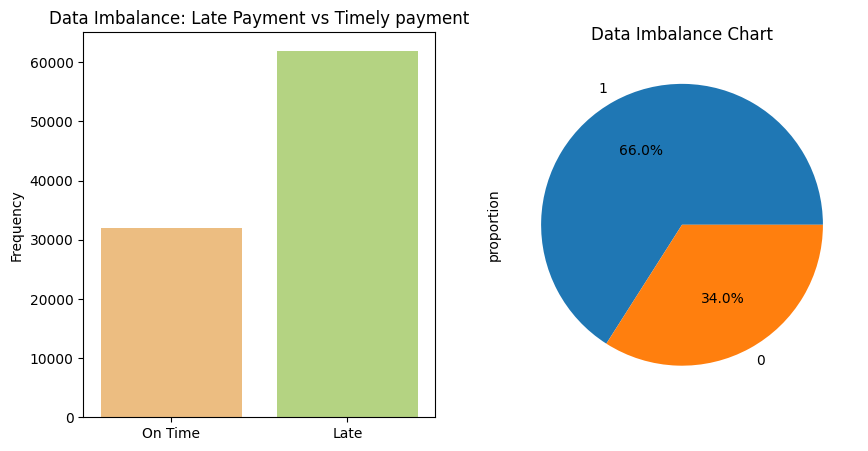

In [87]:
# ploting the late_pay column
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
sns.countplot(x='late_pay', data=repay_data, palette='RdYlGn')

plt.title("Data Imbalance: Late Payment vs Timely payment")
plt.xlabel("")
plt.ylabel("Frequency")
plt.xticks((0,1), ('On Time', 'Late'))

plt.subplot(1,2,2)
#data imbalance chart
(repay_data.late_pay.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Data Imbalance Chart")

plt.show()

#### late_pay

There is a good distribution of data in the target variable.

In [90]:
# Checking the count of late bill payments
repay_data.late_pay.value_counts()

late_pay
1    61974
0    31959
Name: count, dtype: int64

In [91]:
# Checking the percentage of late bill payments
repay_data.late_pay.value_counts(normalize=True)

late_pay
1    0.659768
0    0.340232
Name: proportion, dtype: float64

Approximately, 66% late payments are done.

In [93]:
repay_data["days_late"]=repay_data['RECEIPT_DATE']-repay_data['DUE_DATE']

In [94]:
repay_data['days_late']=pd.to_numeric(repay_data['days_late'].dt.days, downcast='integer')
repay_data['days_late']

0        111
1          3
2        -29
3         17
4         17
        ... 
93932     94
93933     94
93934     94
93935      8
93936      9
Name: days_late, Length: 93933, dtype: int16

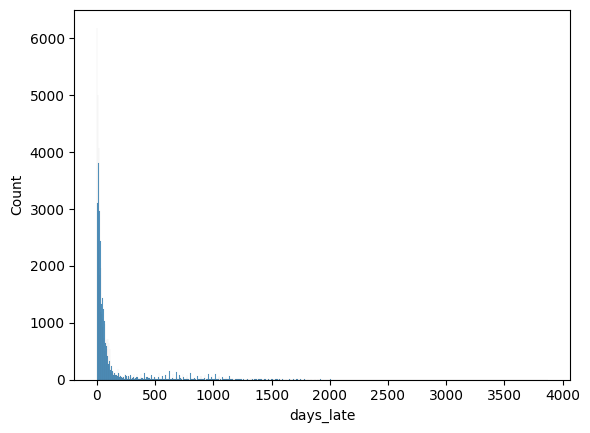

In [95]:
sns.histplot(data=repay_data[repay_data['late_pay']==1],x='days_late')
plt.show()

In [96]:
repay_data['days_late'].describe()

count    93933.000000
mean        70.742306
std        204.415671
min       -340.000000
25%         -4.000000
50%         12.000000
75%         49.000000
max       3873.000000
Name: days_late, dtype: float64

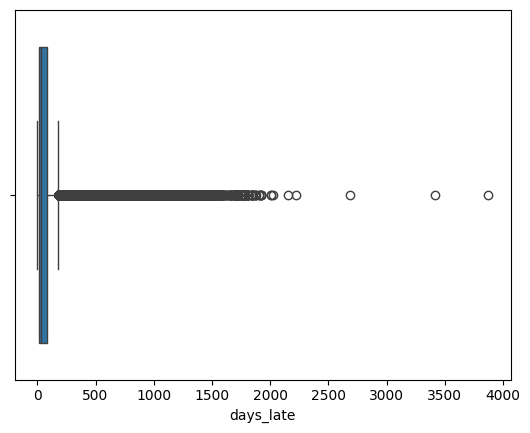

In [97]:
sns.boxplot(data=repay_data[repay_data['late_pay']==1],x='days_late')
plt.show()

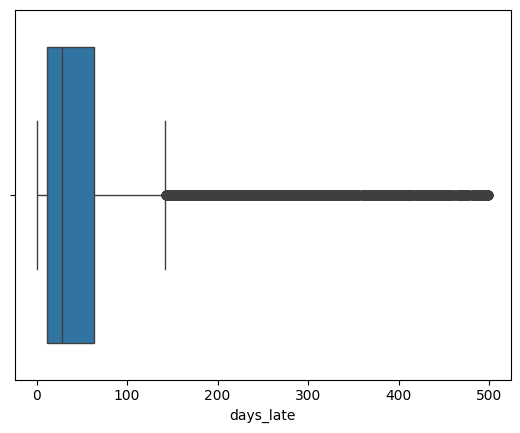

In [98]:
sns.boxplot(data=repay_data[(repay_data['days_late']<500) & (repay_data['days_late']>0)], x='days_late')
plt.show()
# We will have to Bin the Data

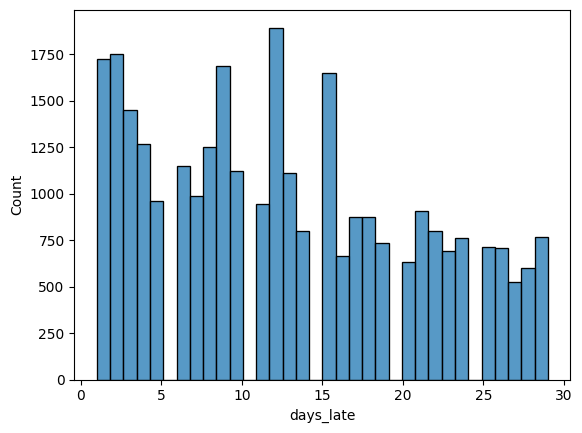

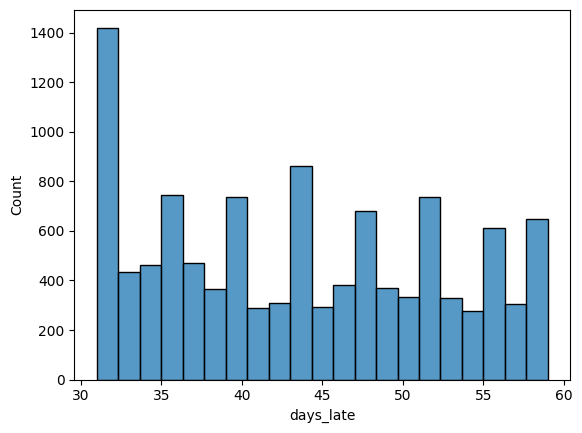

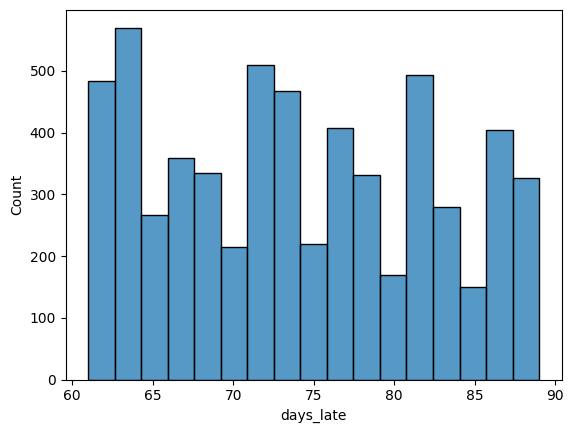

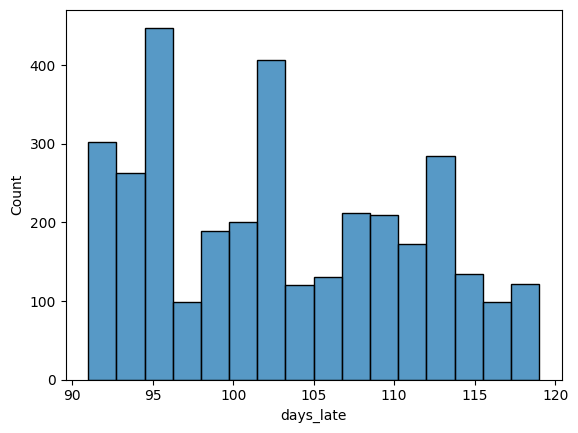

In [99]:
for x in [30,60,90,120]:
    sns.histplot(data=repay_data[(repay_data['days_late']<x) & (repay_data['days_late']>(x-30))], x='days_late')
    plt.show()

In [100]:
repay_data['delay']=pd.cut(repay_data['days_late'], [-400,0,15,30,60,90,180,365,4000],
                   labels=['No Delay', '> Month', '1 Month', '2 Months', '3 Months',
                          '6 Months', '1 Year', 'More than 1 Year']) 
repay_data.delay.value_counts(normalize=True)

delay
No Delay            0.340232
> Month             0.210235
2 Months            0.120426
1 Month             0.118957
3 Months            0.065738
More than 1 Year    0.060213
6 Months            0.056892
1 Year              0.027307
Name: proportion, dtype: float64

In [101]:
repay_data.delay.value_counts().plot.bar()
plt.title('Delay in Payment')

Text(0.5, 1.0, 'Delay in Payment')

In [102]:
repay_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93933 entries, 0 to 93936
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   RECEIPT_METHOD         93933 non-null  object        
 1   CUSTOMER_NAME          93933 non-null  object        
 2   CUSTOMER_NUMBER        93933 non-null  int64         
 3   RECEIPT_DATE           93933 non-null  datetime64[ns]
 4   CURRENCY_CODE          93933 non-null  object        
 5   Local Amount           93933 non-null  float64       
 6   USD Amount             93933 non-null  float64       
 7   INVOICE_ALLOCATED      93933 non-null  object        
 8   INVOICE_CREATION_DATE  93933 non-null  datetime64[ns]
 9   DUE_DATE               93933 non-null  datetime64[ns]
 10  PAYMENT_TERM           93933 non-null  object        
 11  INVOICE_CLASS          93933 non-null  object        
 12  INVOICE_CURRENCY_CODE  93933 non-null  object        
 13  INVOIC

## Bi-variate Analysis

In [104]:
# Extracting month from the date columns

repay_data['month_reciept'] = repay_data['RECEIPT_DATE'].dt.month
repay_data['month_inv_create'] = repay_data['INVOICE_CREATION_DATE'].dt.month
repay_data['month_due'] = repay_data['DUE_DATE'].dt.month

In [105]:
# Monthly due invoices stored in due_month

due_month = repay_data.groupby('month_due').count()['DUE_DATE']
due_month

month_due
1     13389
2     13006
3     14711
4     14131
5     13373
6     10505
7      1595
8      1114
9       982
10     1748
11     2947
12     6432
Name: DUE_DATE, dtype: int64

In [106]:
# Checking the impact of monthly due on late payment rate

# Creating a pivot table to see the effects of different months on percentage of late payments
late_pay_due = repay_data.groupby('month_due').mean(numeric_only= True)['late_pay']
late_pay_due.sort_index(ascending= True)

month_due
1     0.718127
2     0.687529
3     0.622867
4     0.621895
5     0.559859
6     0.417135
7     0.389342
8     0.800718
9     0.976578
10    0.999428
11    1.000000
12    0.999845
Name: late_pay, dtype: float64

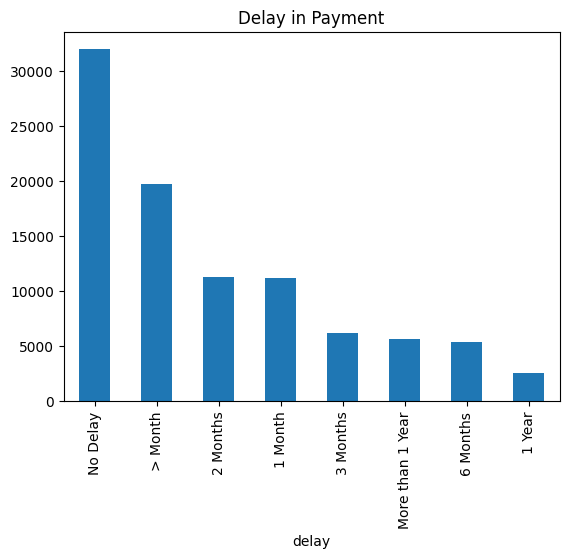

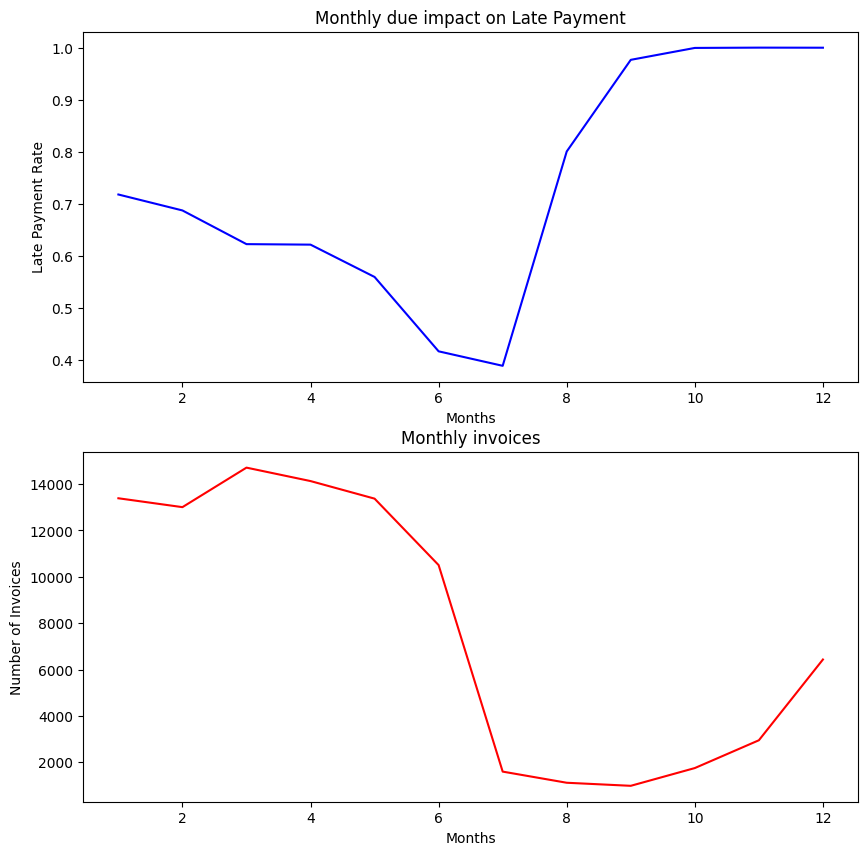

In [107]:
# Visualising the effect of month on late payment rate

plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(late_pay_due, color='blue')
plt.title("Monthly due impact on Late Payment")
plt.xlabel("Months")
plt.ylabel("Late Payment Rate")

plt.subplot(2,1,2)
plt.plot(due_month, color='red')
plt.title("Monthly invoices")
plt.xlabel("Months")
plt.ylabel("Number of Invoices")

plt.show()

##### Inferences

1. From the first graph, 7th Month(July)7 has the very lowest late payment rate, this can be because of the fact that the number of invoices is also low(as visible from second graph)
2. Starting 7th month, the late payment rate increases steeply. Also, the number of invoices are comparatively lower than the first half of the year.
3. For the 3rd month, the number of invoices is the highest and late payment rate is comparatively lower than other months with large number of invoices.

##### # Analysing based on RECEIPT_DATE

In [110]:


order_mon_receipt = repay_data.groupby('month_reciept').count()['DUE_DATE']  # number of payments received in a month

# out of all the payments received in month how many were late payments
mon_late_receipt = repay_data.groupby('month_due').mean(numeric_only= True)['late_pay']

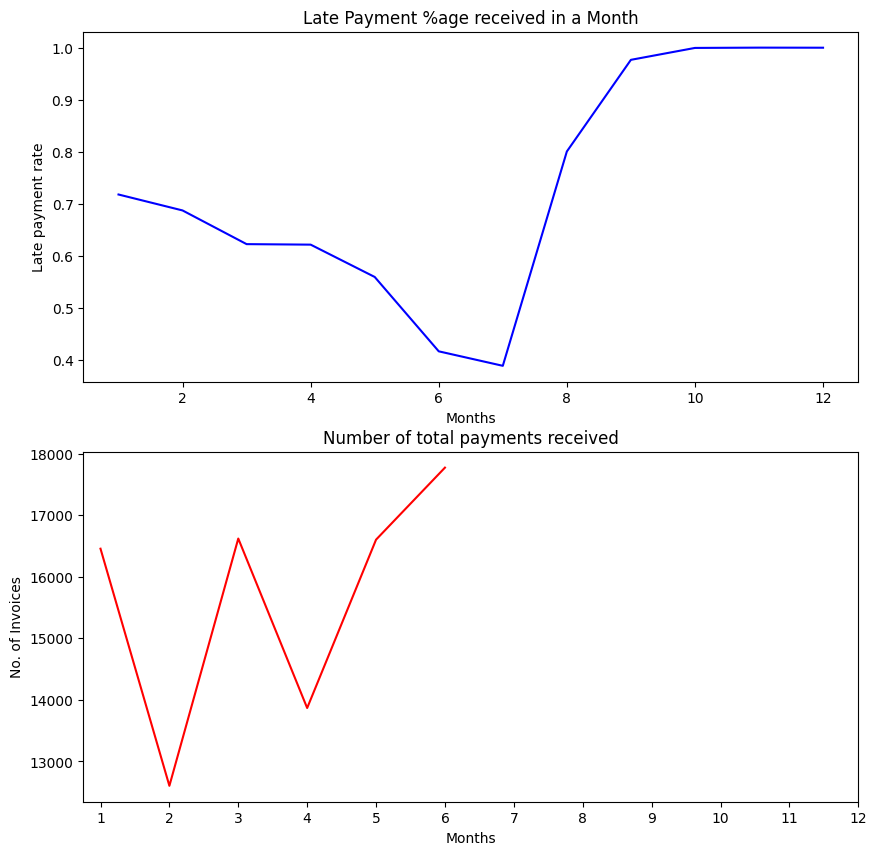

In [111]:
# Visualizing the effect of month in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(mon_late_receipt, color='blue')
plt.title("Late Payment %age received in a Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(order_mon_receipt, color='red')
plt.title("Number of total payments received")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

##### Inference
No payment received against any invoices from 7th month onwards.

##### # Analysing based on Invoice creation date

In [114]:
# invoice creation date

inv_mon_created = repay_data.groupby('month_inv_create').count()['DUE_DATE']  # number of invoices generated in month

mon_created = repay_data.groupby('month_inv_create').mean(numeric_only=True)['late_pay'] # out of all the invoices created % of late payment

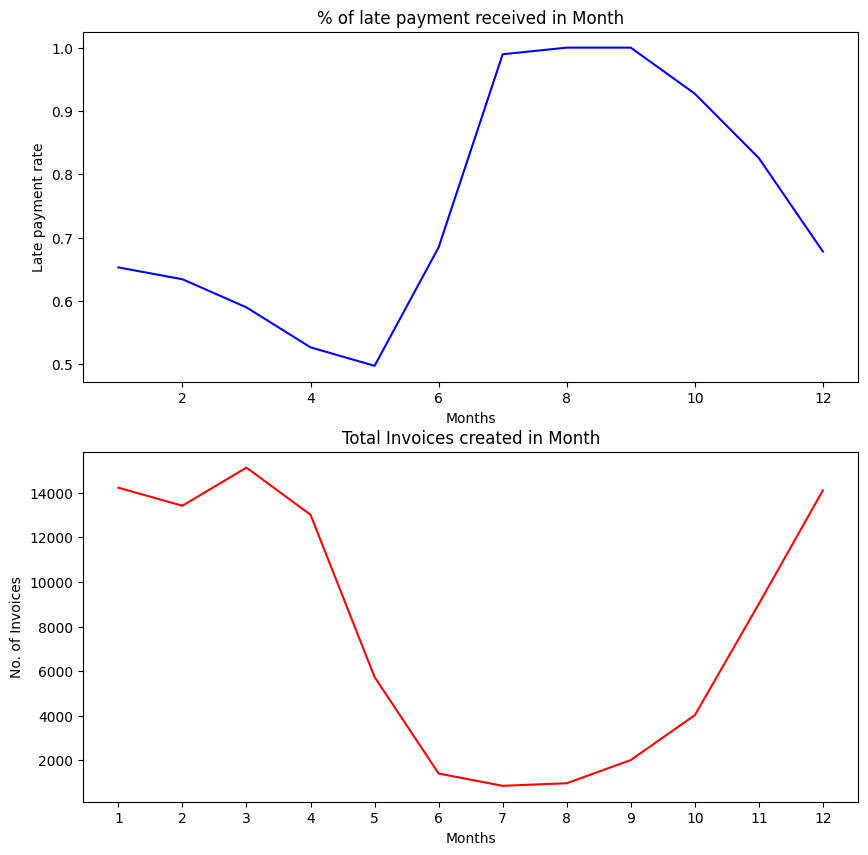

In [115]:
# Visualizing the effect of months in which the invoice is due, on the late payment rate
plt.figure(figsize=(10,10))

plt.subplot(2,1,1)
plt.plot(mon_created, color='blue')
plt.title("% of late payment received in Month")
plt.xlabel("Months")
plt.ylabel("Late payment rate")

plt.subplot(2,1,2)
plt.plot(inv_mon_created, color='red')
plt.title("Total Invoices created in Month")
plt.xticks([i for i in range(1,13,1)])
plt.xlabel("Months")
plt.ylabel("No. of Invoices")

plt.show()

##### Inference
1. Late payment rate is decreases from 1st to 5th month and then shows a very high increase from 7th month2. 
For the months 7, 8 and 9, the late payment rate is very hig and then decreases for 11th and 12th months.

#### Analysing USD Amount column with respect to Late Payment

In [118]:
usd_latepay = repay_data.pivot_table(values='USD Amount', index='late_pay', aggfunc=['mean', 'median', np.std]).reset_index()
usd_latepay

,late_pay,mean,median,std
,,USD Amount,USD Amount,USD Amount
0,0,573789.580869,222908.31,878567.107996
1,1,508573.269141,153246.45,981893.776623


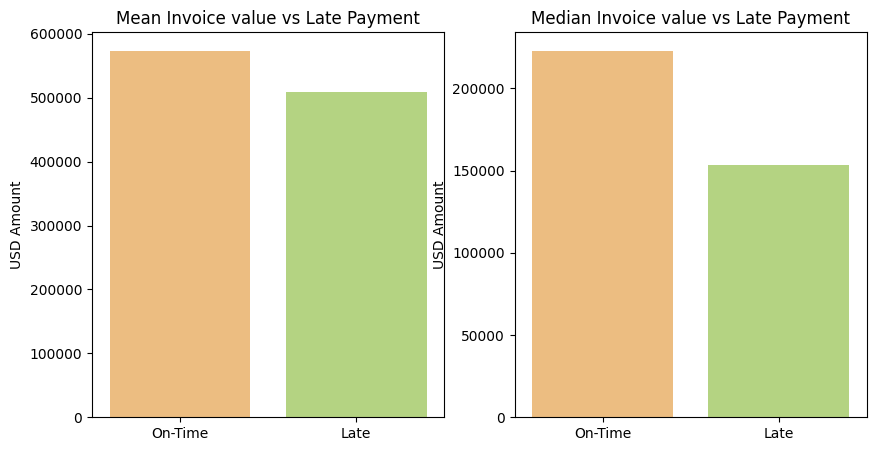

In [119]:
# Visualising the differencing between mean and median of the invoice value with respect to late payment

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)

sns.barplot(data=usd_latepay, x='late_pay', y=('mean','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Mean Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.subplot(1,2,2)

sns.barplot(data=usd_latepay, x='late_pay', y=('median','USD Amount'), palette='RdYlGn')
plt.xticks((0,1), ('On-Time', 'Late'))
plt.title("Median Invoice value vs Late Payment")
plt.xlabel("")
plt.ylabel("USD Amount")

plt.show()

##### Inference- 
Clearly, the mean and median of invoice value of on-time bill payment is higher than late payment.

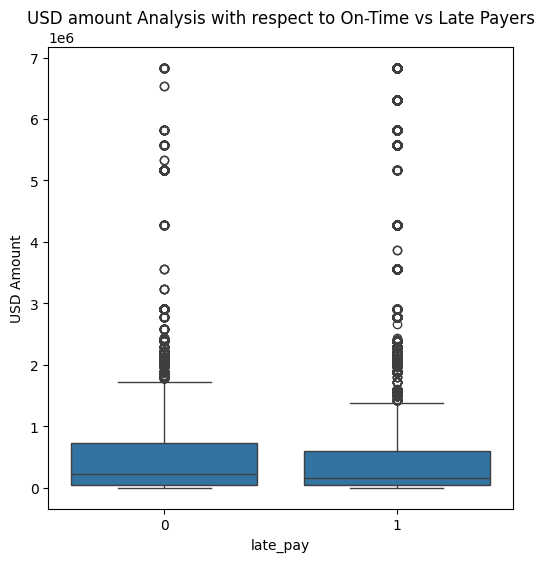

In [121]:
plt.figure(figsize=(6,6))

sns.boxplot(y = 'USD Amount', x='late_pay', data = repay_data)
plt.title("USD amount Analysis with respect to On-Time vs Late Payers")

plt.show()

### Analysing CUSTOMER_NAME column with respect to Late Payment

In [123]:
# Checking total orders for each customer in dataset
customer_orders = repay_data.groupby('CUSTOMER_NAME').count()['late_pay'].sort_values(ascending=False).reset_index()
customer_latepay = repay_data.groupby('CUSTOMER_NAME').mean(numeric_only = True)['late_pay'].sort_values(ascending=False).reset_index()

In [124]:
# Finding the valuable customers (customers with more than 500 orders)

value_cust = customer_orders[customer_orders['late_pay'] > 500]['CUSTOMER_NAME']
value_cust

0     SEPH Corp
1     FARO Corp
2     PARF Corp
3     ALLI Corp
4     AREE Corp
5     DEBE Corp
6     RADW Corp
7     YOUG Corp
8     HABC Corp
9     CARR Corp
10    AL T Corp
11    VAVA Corp
12    CGR  Corp
13    REAL Corp
14    PARI Corp
15    ARAB Corp
16    LIFE Corp
17    AL S Corp
18    MCT  Corp
19    CWF  Corp
20    AL F Corp
21    GIVE Corp
22    CHRI Corp
Name: CUSTOMER_NAME, dtype: object

In [125]:
# Checking only important customers late payment rate

value_latepay = customer_latepay[customer_latepay['CUSTOMER_NAME'].isin(value_cust)]
value_latepay

,CUSTOMER_NAME,late_pay
214,YOUG Corp,1.000000
246,VAVA Corp,0.937873
256,AL T Corp,0.917241
257,GIVE Corp,0.917148
274,LIFE Corp,0.899522
290,PARI Corp,0.876153
309,PARF Corp,0.847222
311,AL S Corp,0.842788
343,CHRI Corp,0.787276
344,CARR Corp,0.786765


### Analysing INVOICE_CLASS column with respect to late payment

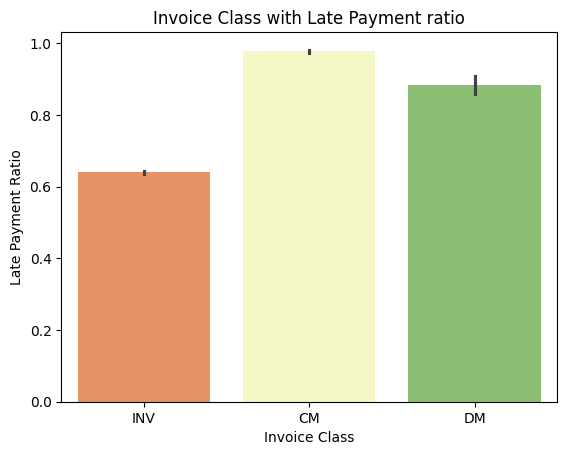

In [127]:
# Visualising the late payment ratio of each invoice class

sns.barplot(data=repay_data, x='INVOICE_CLASS', y='late_pay', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Class with Late Payment ratio")
plt.xlabel("Invoice Class")
plt.ylabel("Late Payment Ratio")
plt.show()

### Analysing INVOICE_TYPE class with respect to late payment

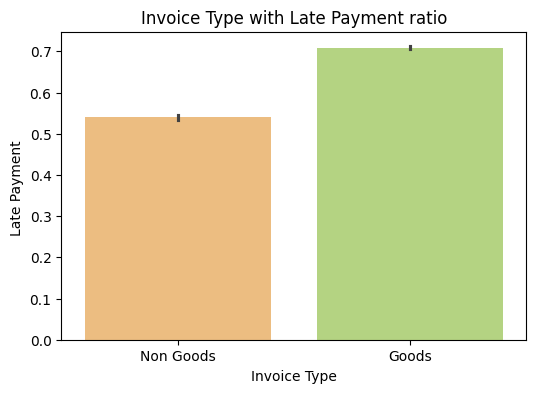

In [129]:
# Visualising the late payment ratio of each Invoice Type
plt.figure(figsize=(6,4))

sns.barplot(data=repay_data, x='INVOICE_TYPE', y='late_pay', estimator=np.mean, palette='RdYlGn')
plt.title("Invoice Type with Late Payment ratio")
plt.xlabel("Invoice Type")
plt.ylabel("Late Payment ")
plt.show()

##### Inference
Late payment ratio for Goods is higher than Non-Goods.

## Step 3: Feature Engineering

###  PAYMENT_TERM column

In [133]:
# We will make use of cumsum() function to get cummulative sum on value_counts()

payterm_cumsum = repay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
payterm_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.211534
30 Days from Inv Date                                      0.367730
60 Days from EOM                                           0.500995
30 Days from EOM                                           0.621358
15 Days from EOM                                           0.701670
Immediate Payment                                          0.759903
Immediate                                                  0.815911
90 Days from EOM                                           0.857356
45 Days from Inv Date                                      0.895149
45 Days from EOM                                           0.932505
90 Days from Inv Date                                      0.956043
100% Adv Payment                                           0.969255
25 DAYS FROM EOM                                           0.974173
Cash on Delivery                                           0.978623
15 Days from Inv Date              

##### # Both "Immediate" and "Immediate payment" are same, hence we will keep only one > "Immediate payment"
##### # 45 Days from EOM and 45 DAYS + EOM are giving same, hence keeping only One > 45 Days from EOM



In [135]:
#Replacing "Immediate" with "Immediate Payment"

repay_data['PAYMENT_TERM'] = repay_data['PAYMENT_TERM'].replace('Immediate', 'Immediate Payment')

# Replacing 45 DAYS + EOM with 45 Days from EOM
repay_data['PAYMENT_TERM'] = repay_data['PAYMENT_TERM'].replace('45 DAYS + EOM', '45 Days from EOM')

payterm_cumsum = repay_data['PAYMENT_TERM'].value_counts(normalize=True).cumsum()
payterm_cumsum

PAYMENT_TERM
60 Days from Inv Date                                      0.211534
30 Days from Inv Date                                      0.367730
60 Days from EOM                                           0.500995
30 Days from EOM                                           0.621358
Immediate Payment                                          0.735599
15 Days from EOM                                           0.815911
90 Days from EOM                                           0.857356
45 Days from EOM                                           0.898140
45 Days from Inv Date                                      0.935933
90 Days from Inv Date                                      0.959471
100% Adv Payment                                           0.972683
25 DAYS FROM EOM                                           0.977601
Cash on Delivery                                           0.982051
15 Days from Inv Date                                      0.985841
On Consignment                     

##### Almost 95% of data is covered by only 10 values, hence we will club the rest of the values to others in both datasets.

In [137]:
# Top 10 values to keep
valid_payterm = payterm_cumsum.index[:10]


In [138]:
# Clubbing the rest values to others
repay_data['PAYMENT_TERM'] = repay_data['PAYMENT_TERM'].apply(lambda x : x if x in valid_payterm else 'others')
repay_data['PAYMENT_TERM'].value_counts() 

PAYMENT_TERM
60 Days from Inv Date    19870
30 Days from Inv Date    14672
60 Days from EOM         12518
30 Days from EOM         11306
Immediate Payment        10731
15 Days from EOM          7544
90 Days from EOM          3893
45 Days from EOM          3831
others                    3807
45 Days from Inv Date     3550
90 Days from Inv Date     2211
Name: count, dtype: int64

##### Dummy Variable: Creating dummy variables for the 'PAYMENT_TERM' column

In [140]:
# Creating dummy variables for the 'PAYMENT_TERM' column > dummy_term

dummy_term = pd.get_dummies(repay_data['PAYMENT_TERM']).drop('others', axis=1)
repay_data = repay_data.join(dummy_term).drop('PAYMENT_TERM', axis=1 )

In [141]:
repay_data.shape 

(93933, 29)

In [142]:
# Creating dummy variables for the 'INVOICE_CLASS' column

dummy_invclass= pd.get_dummies(repay_data['INVOICE_CLASS'])
dummy_invclass
repay_data = repay_data.join(dummy_invclass).drop('INVOICE_CLASS', axis=1 )

In [143]:
repay_data.shape

(93933, 31)

In [144]:
repay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'Local Amount', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'late_pay', 'days_late', 'delay', 'month_reciept',
       'month_inv_create', 'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

# Open Invoice Data

## Reading and understanding the data

In [147]:
# Reading the open invoice dataset
openinv_data = pd.read_csv("Open_Invoice_data.csv", encoding='latin1')
openinv_data.head()

,AS_OF_DATE,Customer Type,Customer_Name,Customer Account No,Transaction Number,Transaction Date,Payment Term,Due Date,Transaction Currency,Local Amount,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,04-APR-2022 01:07:01,3rd Party,GIVE Corp,49144.0,100210000438,21/12/2021,Immediate,21/12/2021,AED,"-3,088",CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000052,01/02/2022,30 Days from Inv Date,03/03/2022,USD,"2,000",INVOICE,33,"2,000",2/1/2022 14:09
2,04-APR-2022 01:07:01,Related Party,AL J Corp,23152.0,100220000143,24/03/2022,30 Days from Inv Date,23/04/2022,USD,"2,000",INVOICE,-18,"2,000",3/24/2022 17:46
3,04-APR-2022 01:07:01,Related Party,AL R Corp,23312.0,100220000001,04/01/2022,15 Days from Inv Date,19/01/2022,AED,"2,415",INVOICE,76,"2,415",1/5/2022 11:49
4,04-APR-2022 01:07:01,Related Party,ALLI Corp,7530.0,100220000105,03/03/2022,30 Days from EOM,30/04/2022,AED,"3,800",INVOICE,-25,"3,800",3/3/2022 22:30


In [148]:
openinv_data.shape

(88204, 14)

##### # Removing unecessary columns > Dropping "Transaction Number","Customer Account No", "Local Amount" as are insignificant

In [150]:
openinv_data.drop(['AS_OF_DATE','Customer Type','Transaction Date','Transaction Currency','Transaction Number',
              'Customer Account No','Local Amount'], axis= 1, inplace= True)

In [151]:
# Checking the shape of the data again
openinv_data.shape

(88204, 7)

In [152]:
# Checking the head
openinv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
0,GIVE Corp,Immediate,21/12/2021,CREDIT NOTE,105,"-3,088",12/21/2021 12:53
1,AL J Corp,30 Days from Inv Date,03/03/2022,INVOICE,33,"2,000",2/1/2022 14:09
2,AL J Corp,30 Days from Inv Date,23/04/2022,INVOICE,-18,"2,000",3/24/2022 17:46
3,AL R Corp,15 Days from Inv Date,19/01/2022,INVOICE,76,"2,415",1/5/2022 11:49
4,ALLI Corp,30 Days from EOM,30/04/2022,INVOICE,-25,"3,800",3/3/2022 22:30


In [153]:
# Checking the info of the data
openinv_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88204 entries, 0 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Customer_Name      88204 non-null  object
 1   Payment Term       88204 non-null  object
 2   Due Date           88204 non-null  object
 3   Transaction Class  88204 non-null  object
 4   AGE                88204 non-null  int64 
 5   USD Amount         88204 non-null  object
 6   INV_CREATION_DATE  88204 non-null  object
dtypes: int64(1), object(6)
memory usage: 4.7+ MB


All columns seem to be in incorrect datatype, we need to convert it.

In [155]:
# Checking for null values
round(openinv_data.isna().sum()/len(openinv_data.index), 4)

Customer_Name        0.0
Payment Term         0.0
Due Date             0.0
Transaction Class    0.0
AGE                  0.0
USD Amount           0.0
INV_CREATION_DATE    0.0
dtype: float64

No null values present in the dataset.

In [157]:
# Changing the format of 'Due Date' and 'INV_CREATION_DATE' to datetime

openinv_data['Due Date'] = pd.to_datetime(openinv_data['Due Date'])
openinv_data['INV_CREATION_DATE'] = pd.to_datetime(openinv_data['INV_CREATION_DATE'])

In [158]:
# Checking the different values present in USD Amount column

openinv_data['USD Amount'].unique()

array(['-3,088', '2,000', '2,415', ..., '-914', '12,866', '18,118'],
      dtype=object)

In [159]:
openinv_data['USD Amount'].value_counts()

USD Amount
27        5278
53        5124
85        2974
13        2580
128       1140
          ... 
-1,003       1
8,898        1
5,043        1
9,724        1
18,118       1
Name: count, Length: 18185, dtype: int64

##### # Since 'USD Amount' column has object datatpe, hence converting the datatype of USD Amount

##### # There are negative values present in the column, hence it is safe to remove negative and 0 values.

In [161]:
openinv_data['USD Amount'] = openinv_data['USD Amount'].apply(lambda x: x.replace(",", ""))
openinv_data['USD Amount'] = openinv_data['USD Amount'].astype(int)

In [162]:
# Checking the USD Amount column again
openinv_data['USD Amount']

0        -3088
1         2000
2         2000
3         2415
4         3800
         ...  
88199    -1199
88200     -914
88201    12866
88202    18118
88203    18499
Name: USD Amount, Length: 88204, dtype: int32

In [163]:
# Removing -ve values, and keeping only the values above 0 for USD Amount column
openinv_data = openinv_data[openinv_data['USD Amount']>0]

In [164]:
# Checking the info of the data set
openinv_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 79516 entries, 1 to 88203
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Customer_Name      79516 non-null  object        
 1   Payment Term       79516 non-null  object        
 2   Due Date           79516 non-null  datetime64[ns]
 3   Transaction Class  79516 non-null  object        
 4   AGE                79516 non-null  int64         
 5   USD Amount         79516 non-null  int32         
 6   INV_CREATION_DATE  79516 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int32(1), int64(1), object(3)
memory usage: 4.5+ MB


All the columns are in correct format now.

## Feature Engineering

#### Analysing Payment Term column

In [168]:
openinv_data.head()

,Customer_Name,Payment Term,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE
1,AL J Corp,30 Days from Inv Date,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00
2,AL J Corp,30 Days from Inv Date,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00
3,AL R Corp,15 Days from Inv Date,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00
4,ALLI Corp,30 Days from EOM,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00
5,ALLI Corp,30 Days from EOM,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00


In [169]:
# Similar to what we did in Recieved Payment Dataset

openinv_data['Payment Term'] = openinv_data['Payment Term'].apply(lambda x: x if x in valid_payterm else 'others')
openinv_data['Payment Term'].value_counts()

Payment Term
30 Days from Inv Date    18328
60 Days from Inv Date    17599
Immediate Payment        16202
60 Days from EOM          8170
others                    5385
30 Days from EOM          5324
90 Days from EOM          2595
90 Days from Inv Date     2429
45 Days from Inv Date     1533
15 Days from EOM          1097
45 Days from EOM           854
Name: count, dtype: int64

In [170]:
# Creating dummy variables for the column
dummyterm_open = pd.get_dummies(openinv_data['Payment Term']).drop('others', axis=1)

In [171]:
# Merging the dummies dataframe into open_data and removing the 'Payment Term' column
openinv_data = openinv_data.join(dummyterm_open).drop('Payment Term', axis=1)
openinv_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,False,False,True,False,False,False,False,False,False,False
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,False,False,True,False,False,False,False,False,False,False
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,False,False,False,False,False,False,False,False,False,False
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,False,True,False,False,False,False,False,False,False,False


In [172]:
openinv_data = openinv_data.applymap(lambda x: int(x) if isinstance(x, bool) else x)
openinv_data.head()

,Customer_Name,Due Date,Transaction Class,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment
1,AL J Corp,2022-03-03,INVOICE,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0
2,AL J Corp,2022-04-23,INVOICE,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0
3,AL R Corp,2022-01-19,INVOICE,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0
4,ALLI Corp,2022-04-30,INVOICE,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0
5,ALLI Corp,2022-04-30,INVOICE,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0


#### Analysing 'Transaction Class' column

In [174]:
# Checking the column
openinv_data['Transaction Class'].value_counts()

Transaction Class
INVOICE       78251
DEBIT NOTE     1265
Name: count, dtype: int64

In [175]:
# Replacing INVOICE with INV and DEBIT NOTE WITH DM
openinv_data['Transaction Class'] = openinv_data['Transaction Class'].map(lambda x: 'INV' if x=='INVOICE' else 'DM')

In [176]:
# Creating dummy variables for the column
tc_dummy = pd.get_dummies(openinv_data['Transaction Class'])

In [177]:
# Adding the dummy variables to main dataset and dropping the Transaction Class column
openinv_data = openinv_data.join(tc_dummy).drop('Transaction Class', axis=1)

In [178]:
# Adding 'CM' level to the open_data dataset same as received payment data
openinv_data['CM'] = 0

In [179]:
# Checking the head of the data
openinv_data.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
1,AL J Corp,2022-03-03,33,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,False,True,0
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,False,True,0
3,AL R Corp,2022-01-19,76,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,False,True,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0


### Checking columns in received payment dataset and open invoice dataset

In [181]:
repay_data.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'Local Amount', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'late_pay', 'days_late', 'delay', 'month_reciept',
       'month_inv_create', 'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV'],
      dtype='object')

In [182]:
openinv_data.columns

Index(['Customer_Name', 'Due Date', 'AGE', 'USD Amount', 'INV_CREATION_DATE',
       '15 Days from EOM', '30 Days from EOM', '30 Days from Inv Date',
       '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
       '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date',
       'Immediate Payment', 'DM', 'INV', 'CM'],
      dtype='object')

# Clustering

In [184]:
# Importing libraries for clustering

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Customer Segmentation:
#### 
Recommendation: Customer-level attributes could also be important independent variables to be included in the model. A customer-level attribute can be determined via customer segmentation. You have to segment your customers based on two derived variables: the average payment time in days for a customer and the standard deviation for the payment time. Using clustering techniques would result in a few distinct clusters of customers, which can be used as an input variable for the ML model.

In [186]:
# Creating a new column to show actual number of days taken to make the payment after invoice generation
repay_data['credit_period'] = (repay_data['RECEIPT_DATE']-repay_data['INVOICE_CREATION_DATE']).dt.days

In [187]:
repay_data['credit_period']

0        169
1         33
2          1
3         47
4         47
        ... 
93932     94
93933     94
93934     94
93935     67
93936     51
Name: credit_period, Length: 93933, dtype: int64

In [188]:
# Calculating customer wise average days for payment
cust_seg= repay_data.groupby('CUSTOMER_NAME')['credit_period'].mean()
cust_seg = cust_seg.to_frame()
cust_seg.reset_index()
cust_seg.rename(columns={'credit_period': 'Avg days for payment'}, inplace=True)
cust_seg

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250
...,...
YOUS Corp,117.000000
ZAHR Corp,144.928571
ZAIN Corp,67.095238


In [189]:
cust_seg.head(10)

,Avg days for payment
CUSTOMER_NAME,
3D D Corp,24.395349
6TH Corp,40.666667
A3 D Corp,45.400000
ABC Corp,16.000000
ABDU Corp,76.906250
ABED Corp,14.500000
ABEE Corp,2.000000
ABU Corp,126.454545
ABWA Corp,56.500000


In [190]:
# Calculating the standard deviation for customer wise payment days
cust_sd = repay_data.groupby('CUSTOMER_NAME')['credit_period'].std()
cust_sd = cust_sd.to_frame()
cust_sd.reset_index
cust_sd.rename(columns={'credit_period': 'Std deviation for payment'}, inplace=True)
cust_sd.head()

,Std deviation for payment
CUSTOMER_NAME,
3D D Corp,13.040449
6TH Corp,7.952987
A3 D Corp,52.581366
ABC Corp,0.000000
ABDU Corp,54.919326


In [191]:
# Merging the above two dataframes
seg_merge = pd.merge(cust_seg, cust_sd, how='inner', on='CUSTOMER_NAME')

In [192]:
# Checking the head
seg_merge.head()

,Avg days for payment,Std deviation for payment
CUSTOMER_NAME,,
3D D Corp,24.395349,13.040449
6TH Corp,40.666667,7.952987
A3 D Corp,45.400000,52.581366
ABC Corp,16.000000,0.000000
ABDU Corp,76.906250,54.919326


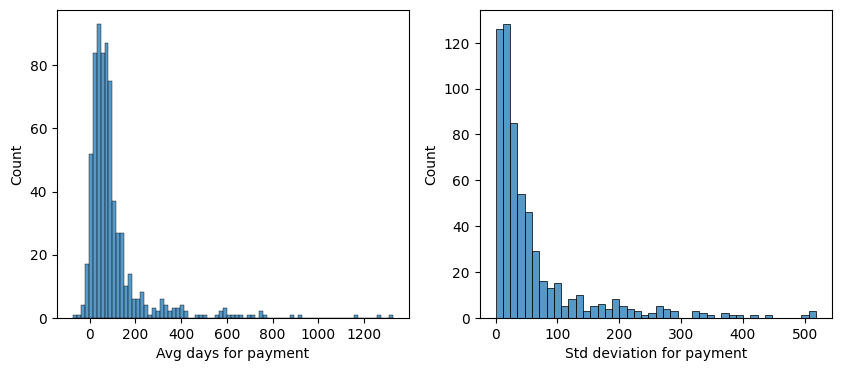

In [193]:
# Visualising the cust_seg dataframe
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(seg_merge['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(seg_merge['Std deviation for payment'])

plt.show()

#### Inference
##### From the above plots we can see that the data is not normalized, hence need to do scaling.

In [195]:
# check statastical data for numerical variable 
seg_merge.describe()

,Avg days for payment,Std deviation for payment
count,690.000000,604.000000
mean,102.775779,59.921642
std,145.421353,82.402732
min,-73.369231,0.000000
25%,32.745464,14.470913
50%,66.533333,30.035854
75%,109.937500,64.544130
max,1327.333333,518.317279


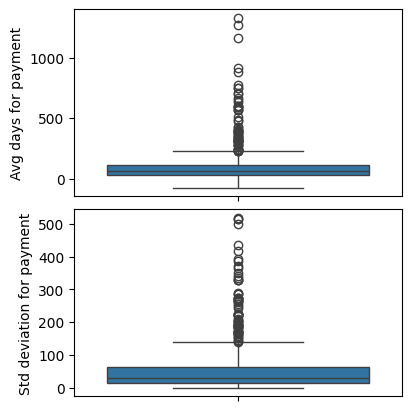

In [197]:
# Plot Avg days for payment, Std deviation for payment to check for outliers
plt.figure(figsize=[4,4],layout='constrained')
plt.subplot(2,1,1)
sns.boxplot(seg_merge['Avg days for payment'])
plt.subplot(2,1,2)
sns.boxplot(seg_merge['Std deviation for payment'])
plt.show()

In [198]:
scaler=StandardScaler()


In [199]:
seg_merge[['Avg days for payment', 'Std deviation for payment']] = scaler.fit_transform(seg_merge[['Avg days for payment', 'Std deviation for payment']])

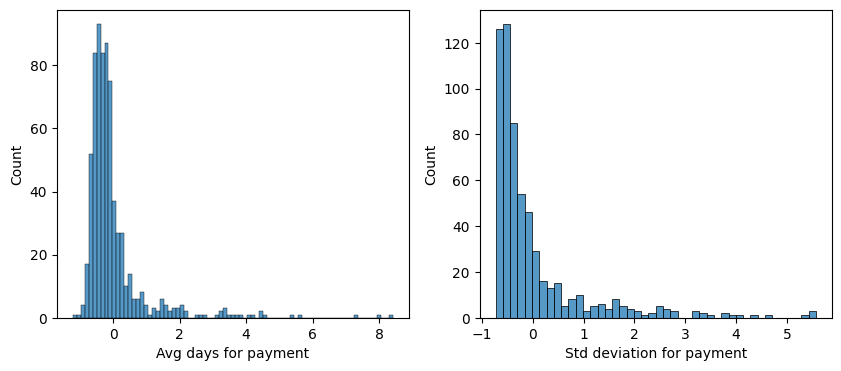

In [200]:
# Visualising the data again
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
sns.histplot(seg_merge['Avg days for payment'])

plt.subplot(1,2,2)
sns.histplot(seg_merge['Std deviation for payment'])

plt.show()

In [201]:
# resetting the index
seg_merge.reset_index(inplace=True)

In [202]:
# Checking the null values if present
round(seg_merge.isna().sum()/len(seg_merge.index), 4)

CUSTOMER_NAME                0.0000
Avg days for payment         0.0000
Std deviation for payment    0.1246
dtype: float64

In [203]:
# Replacing the null values for Std deviation for payment with 0
seg_merge['Std deviation for payment'].fillna(0,inplace=True)

In [204]:
# copying the seg_merge data for clustering into new dataframe
cluster_data = seg_merge.copy()
cluster_data.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment
0,3D D Corp,-0.539379,-0.569399
1,6TH Corp,-0.427407,-0.631189
2,A3 D Corp,-0.394835,-0.089152
3,ABC Corp,-0.597153,-0.727783
4,ABDU Corp,-0.178023,-0.060756


In [205]:
#dropping customer_name for clustering
cluster_data.drop('CUSTOMER_NAME',axis=1,inplace=True)
cluster_data.head()

,Avg days for payment,Std deviation for payment
0,-0.539379,-0.569399
1,-0.427407,-0.631189
2,-0.394835,-0.089152
3,-0.597153,-0.727783
4,-0.178023,-0.060756


## Clustering

In [207]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50, random_state=42)
kmeans.fit(cluster_data)
kmeans.cluster_centers_

array([[-0.31028095, -0.33250108],
       [ 4.56854177,  0.4933369 ],
       [ 1.75922594,  3.35874847],
       [ 0.46924076,  0.93237447]])

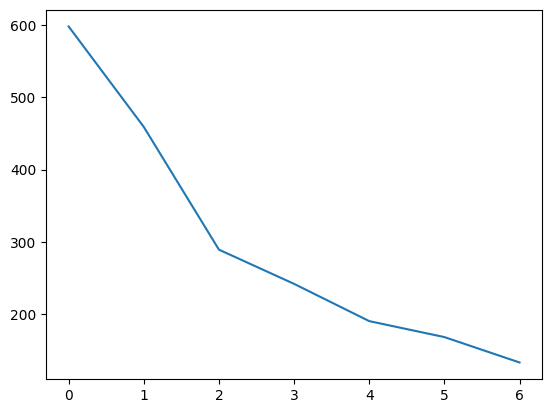

In [208]:
# elbow-curve
ssd = []
cluster_range = [2,3,4,5,6,7,8]
for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50,  random_state=42)
    kmeans.fit(cluster_data)
    ssd.append(kmeans.inertia_)

plt.plot(ssd)
plt.show()

#### Silhouette analysis : Finding optimal number of clusters

In [210]:
# silhouette analysis


for cluster in cluster_range:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=cluster, max_iter=50, random_state=42)
    kmeans.fit(cluster_data)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(cluster_data, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(cluster, silhouette_avg))

For n_clusters=2, the silhouette score is 0.7512198959242521
For n_clusters=3, the silhouette score is 0.6083477287571657
For n_clusters=4, the silhouette score is 0.6114775297760283
For n_clusters=5, the silhouette score is 0.3987005610663089
For n_clusters=6, the silhouette score is 0.3980707870888025
For n_clusters=7, the silhouette score is 0.37108367800016495
For n_clusters=8, the silhouette score is 0.4154930610650793


#### From the above results, we can see that for 3 clusters, the silhouette score is decent. Hence selecting n_clusters as 3.

In [212]:
# final model with n_clusters=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(cluster_data)

KMeans(max_iter=50, n_clusters=3)

In [213]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [214]:
# Assigning labels to the cust_seg dataframe
seg_merge['cluster_id'] = kmeans.labels_
seg_merge.head()

,CUSTOMER_NAME,Avg days for payment,Std deviation for payment,cluster_id
0,3D D Corp,-0.539379,-0.569399,1
1,6TH Corp,-0.427407,-0.631189,1
2,A3 D Corp,-0.394835,-0.089152,1
3,ABC Corp,-0.597153,-0.727783,1
4,ABDU Corp,-0.178023,-0.060756,1


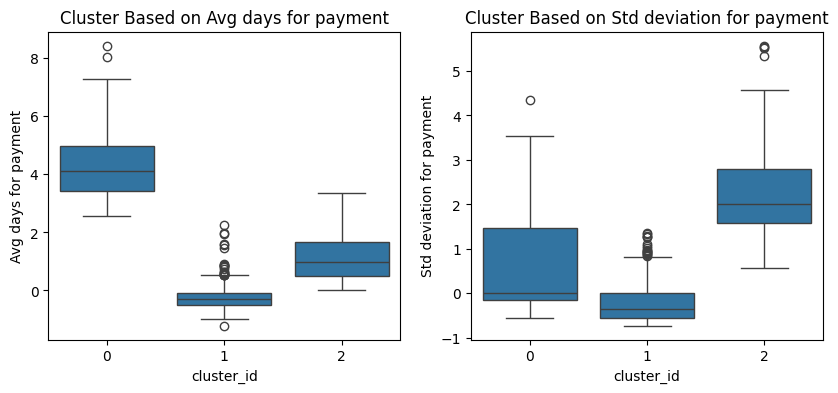

In [215]:
# Plotting box plot based on clusters
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.boxplot(x='cluster_id', y='Avg days for payment', data=seg_merge)
plt.title("Cluster Based on Avg days for payment")


plt.subplot(1,2,2)
sns.boxplot(x='cluster_id', y='Std deviation for payment', data=seg_merge)
plt.title("Cluster Based on Std deviation for payment")
plt.show()

#### # Inference-
##### # 0 Cluster -- Medium Invoice Payment   - These customers usually pay their invoices on time or within 20 to 60 days

##### # 1 ' Cluster -- Early Invoice Payme     - These customers usually pay their invoices on time

##### # 2 Cluster -- Delay or Late Invoice Payment - 

##### # The variability is highest when credit period is between 20 to 60 dayt


##### # Merging the data sets : We need to assign cluster ID to each customer in open invoice dataset

In [218]:
# Dropping the 'Avg days for payment' and 'Std deviation for payment' columns 
seg_merge.drop(['Avg days for payment', 'Std deviation for payment'], axis=1, inplace=True)

In [219]:
# Creating a copy
merge_copy = seg_merge.copy()

In [220]:
# Renaming the column
merge_copy.rename(columns={'CUSTOMER_NAME':'Customer_Name'}, inplace=True)

# Setting the 'Customer_Name' as index
merge_copy.set_index('Customer_Name')

,cluster_id
Customer_Name,
3D D Corp,1
6TH Corp,1
A3 D Corp,1
ABC Corp,1
ABDU Corp,1
...,...
YOUS Corp,1
ZAHR Corp,1
ZAIN Corp,1


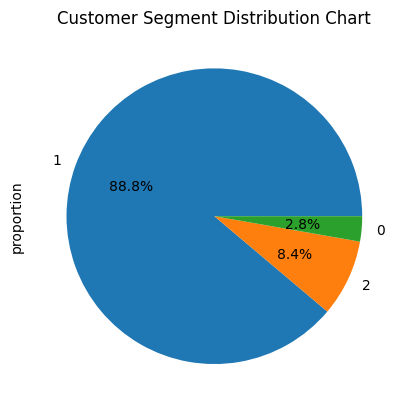

In [221]:
(merge_copy.cluster_id.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Customer Segment Distribution Chart")
plt.show()

'1' Cluster -- Early Invoice Payment

'2' Cluster -- Delay or Late Invoice Paymentn

'0' Cluster -- Medium Invoice Payment

-- We can see that Early customers comprise= 88.8% of customers, medium = 2.8% , and Late payers are 8.4% in total

In [224]:
# Merging rec_pay_data and cust_deg to add clustering index
merged_df = pd.merge(repay_data, seg_merge, how='inner', on='CUSTOMER_NAME')
merged_df.head()

,RECEIPT_METHOD,CUSTOMER_NAME,CUSTOMER_NUMBER,RECEIPT_DATE,CURRENCY_CODE,Local Amount,USD Amount,INVOICE_ALLOCATED,INVOICE_CREATION_DATE,DUE_DATE,...,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,CM,DM,INV,credit_period,cluster_id
0,WIRE,C EA Corp,37403,2021-04-20,USD,370990.92,101018.63040,14200000001,2020-11-02,2020-12-30,...,False,False,False,False,False,False,False,True,169,1
1,WIRE,RADW Corp,4003,2021-01-31,SAR,183750.00,48990.21133,99200000043,2020-12-29,2021-01-28,...,False,False,False,False,False,False,False,True,33,1
2,WIRE,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99210000003,2021-01-30,2021-03-01,...,False,False,False,False,False,False,False,True,1,1
3,WIRE,FARO Corp,1409,2021-01-31,SAR,157500.00,41991.60971,99200000038,2020-12-15,2021-01-14,...,False,False,False,False,False,False,False,True,47,2
4,WIRE,RADW Corp,4003,2021-01-31,SAR,157500.00,41991.60971,99200000039,2020-12-15,2021-01-14,...,False,False,False,False,False,False,False,True,47,1


In [225]:
# checking null values for clusters
merged_df['cluster_id'].isnull().sum()

0

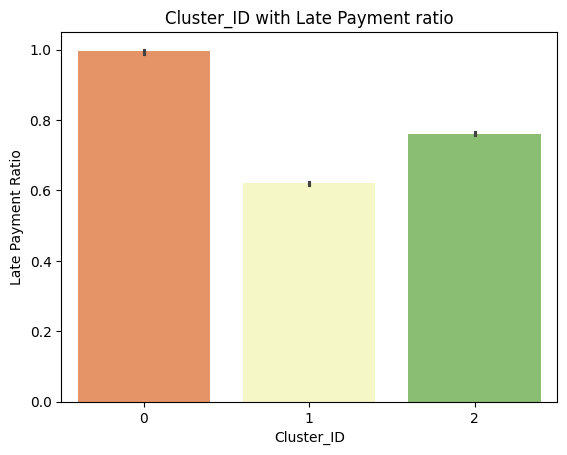

In [226]:
sns.barplot(data=merged_df, x='cluster_id', y='late_pay', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()

In [227]:
merged_df.columns

Index(['RECEIPT_METHOD', 'CUSTOMER_NAME', 'CUSTOMER_NUMBER', 'RECEIPT_DATE',
       'CURRENCY_CODE', 'Local Amount', 'USD Amount', 'INVOICE_ALLOCATED',
       'INVOICE_CREATION_DATE', 'DUE_DATE', 'INVOICE_CURRENCY_CODE',
       'INVOICE_TYPE', 'late_pay', 'days_late', 'delay', 'month_reciept',
       'month_inv_create', 'month_due', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'CM', 'DM', 'INV',
       'credit_period', 'cluster_id'],
      dtype='object')

## Step 4: Data Preparation for Model building

In [229]:
# Creating a new dataframe with important variables for model building
df1 = merged_df[['USD Amount','INVOICE_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                    '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM', 
                    '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                    'DM', 'INV', 'CM','cluster_id']]
df1.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.63040,2020-11-02,False,True,False,False,False,False,False,False,False,False,False,True,False,1
1,48990.21133,2020-12-29,False,False,True,False,False,False,False,False,False,False,False,True,False,1
2,41991.60971,2021-01-30,False,False,True,False,False,False,False,False,False,False,False,True,False,1
3,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,True,False,2
4,41991.60971,2020-12-15,False,False,True,False,False,False,False,False,False,False,False,True,False,1


In [230]:
df1 = df1.applymap(lambda x: int(x) if isinstance(x, bool) else x)
df1.head()

,USD Amount,INVOICE_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,101018.63040,2020-11-02,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,48990.21133,2020-12-29,0,0,1,0,0,0,0,0,0,0,0,1,0,1
2,41991.60971,2021-01-30,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0,2
4,41991.60971,2020-12-15,0,0,1,0,0,0,0,0,0,0,0,1,0,1


In [231]:
# Creating Invoice_Month column and dropping INVOICE_CREATION_DATE
df1['Invoice_Month'] = df1['INVOICE_CREATION_DATE'].dt.month
df1.drop('INVOICE_CREATION_DATE',axis=1,inplace= True)
df1.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,2,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12


In [232]:
df1.shape

(93933, 16)

In [233]:
# Open Invoice dataset
open_df = openinv_data[['Due Date','USD Amount', 'INV_CREATION_DATE', '15 Days from EOM', '30 Days from EOM', 
                         '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date', '60 Days from EOM',
                         '60 Days from Inv Date', '90 Days from EOM', '90 Days from Inv Date', 'Immediate Payment', 
                         'DM', 'INV', 'CM','AGE']]
open_df.head()

,Due Date,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE
1,2022-03-03,2000,2022-02-01 14:09:00,0,0,1,0,0,0,0,0,0,0,False,True,0,33
2,2022-04-23,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,False,True,0,-18
3,2022-01-19,2415,2022-01-05 11:49:00,0,0,0,0,0,0,0,0,0,0,False,True,0,76
4,2022-04-30,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,-25
5,2022-04-30,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,-25


In [234]:
# Creating Invoice_Month column and dropping INV_CREATION_DATE
open_df['Invoice_Month'] = open_df['INV_CREATION_DATE'].dt.month
open_df.drop('INV_CREATION_DATE',axis=1,inplace= True)
open_df.head()

,Due Date,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month
1,2022-03-03,2000,0,0,1,0,0,0,0,0,0,0,False,True,0,33,2
2,2022-04-23,2000,0,0,1,0,0,0,0,0,0,0,False,True,0,-18,3
3,2022-01-19,2415,0,0,0,0,0,0,0,0,0,0,False,True,0,76,1
4,2022-04-30,3800,0,1,0,0,0,0,0,0,0,0,False,True,0,-25,3
5,2022-04-30,1264,0,1,0,0,0,0,0,0,0,0,False,True,0,-25,3


In [235]:
# Creating Due_Month column and dropping Due Date
open_df['Due_Month'] = open_df['Due Date'].dt.month
open_df.drop('Due Date',axis=1,inplace= True)
open_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,False,True,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,False,True,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,False,True,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,False,True,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,False,True,0,-25,3,4


In [236]:
open_df = open_df.applymap(lambda x: int(x) if isinstance(x, bool) else x)
open_df.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,AGE,Invoice_Month,Due_Month
1,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,33,2,3
2,2000,0,0,1,0,0,0,0,0,0,0,0,1,0,-18,3,4
3,2415,0,0,0,0,0,0,0,0,0,0,0,1,0,76,1,1
4,3800,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4
5,1264,0,1,0,0,0,0,0,0,0,0,0,1,0,-25,3,4


In [237]:
# Checking columns for both datasets
df1.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [238]:
open_df.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM', 'AGE',
       'Invoice_Month', 'Due_Month'],
      dtype='object')

### Train- Test Split

In [240]:
# Feature variables X
X = df1.copy()
X.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
0,101018.63040,0,1,0,0,0,0,0,0,0,0,0,1,0,1,11
1,48990.21133,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
2,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1
3,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,2,12
4,41991.60971,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12


In [241]:
# Target variable y
y = merged_df['late_pay']
y.head()

0    1
1    1
2    0
3    1
4    1
Name: late_pay, dtype: int32

In [242]:
# Splitting into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
5958,35937.12730,0,0,0,0,0,1,0,0,0,0,0,1,0,2,11
92965,29632.31000,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
85159,551128.99700,0,0,0,0,0,0,1,0,0,0,0,1,0,2,12
71124,68.60000,0,1,0,0,0,0,0,0,0,0,0,1,0,1,2
8032,1716.32403,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11


#### Feature Scaling

In [244]:
X_train.shape

(65753, 16)

In [245]:
# Feature scaling for USD amount
scaler = StandardScaler()
X_train['USD Amount'] = scaler.fit_transform(X_train[['USD Amount']])
X_train.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
5958,-0.523155,0,0,0,0,0,1,0,0,0,0,0,1,0,2,11
92965,-0.529797,0,0,1,0,0,0,0,0,0,0,0,1,0,1,12
85159,0.019524,0,0,0,0,0,0,1,0,0,0,0,1,0,2,12
71124,-0.560938,0,1,0,0,0,0,0,0,0,0,0,1,0,1,2
8032,-0.559202,0,0,1,0,0,0,0,0,0,0,0,1,0,1,11


In [246]:
X_train.describe()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Invoice_Month
count,6.575300e+04,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000,65753.000000
mean,-2.998732e-17,0.078567,0.120755,0.155324,0.041093,0.038797,0.133317,0.211215,0.041093,0.023756,0.114961,0.005916,0.937645,0.056438,1.273113,5.501133
std,1.000008e+00,0.269063,0.325845,0.362216,0.198507,0.193112,0.339920,0.408173,0.198507,0.152288,0.318977,0.076689,0.241800,0.230768,0.450788,4.079762
min,-5.610099e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,-5.213374e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000
50%,-3.672907e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,4.000000
75%,7.059563e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,10.000000
max,6.640493e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,12.000000


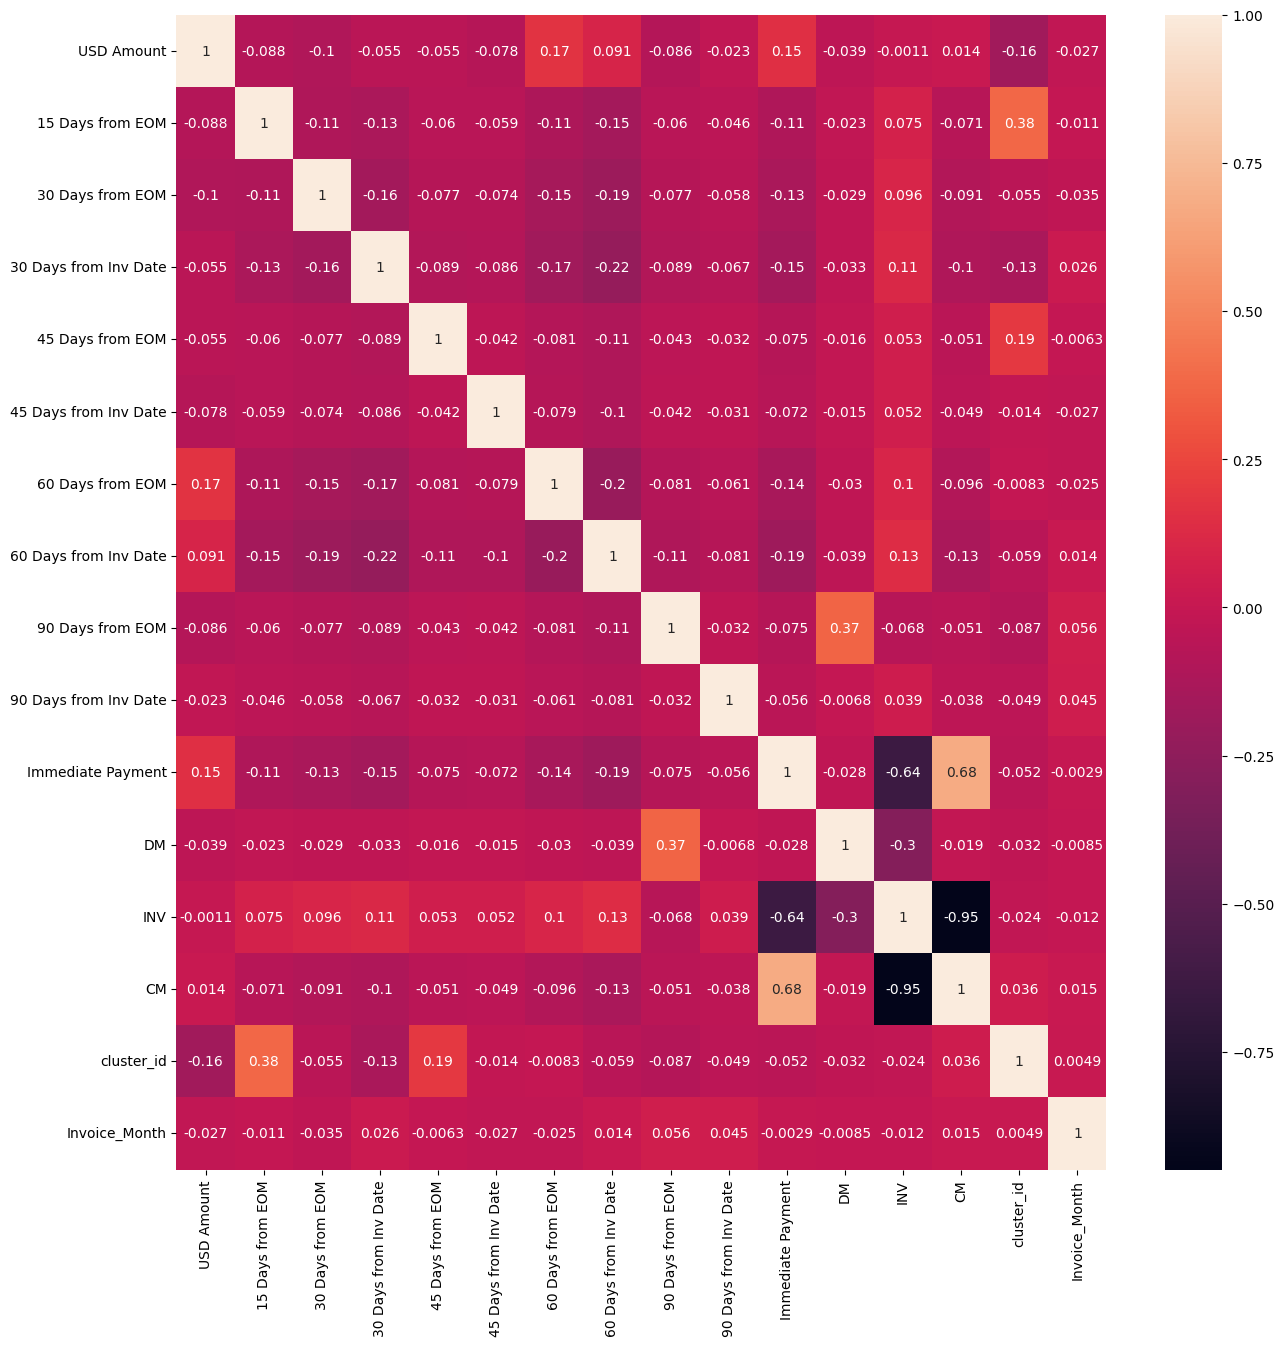

In [247]:
# Plotting heat map of X_train dataset
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

##### # Inference-
CM & INV, INV & Immediate Payment, DM & 90 days from EOM has high multicollinearity, hence dropping these columns.

In [249]:
X_train.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)
X_test.drop(['CM', 'INV', 'DM'], axis=1, inplace=True)

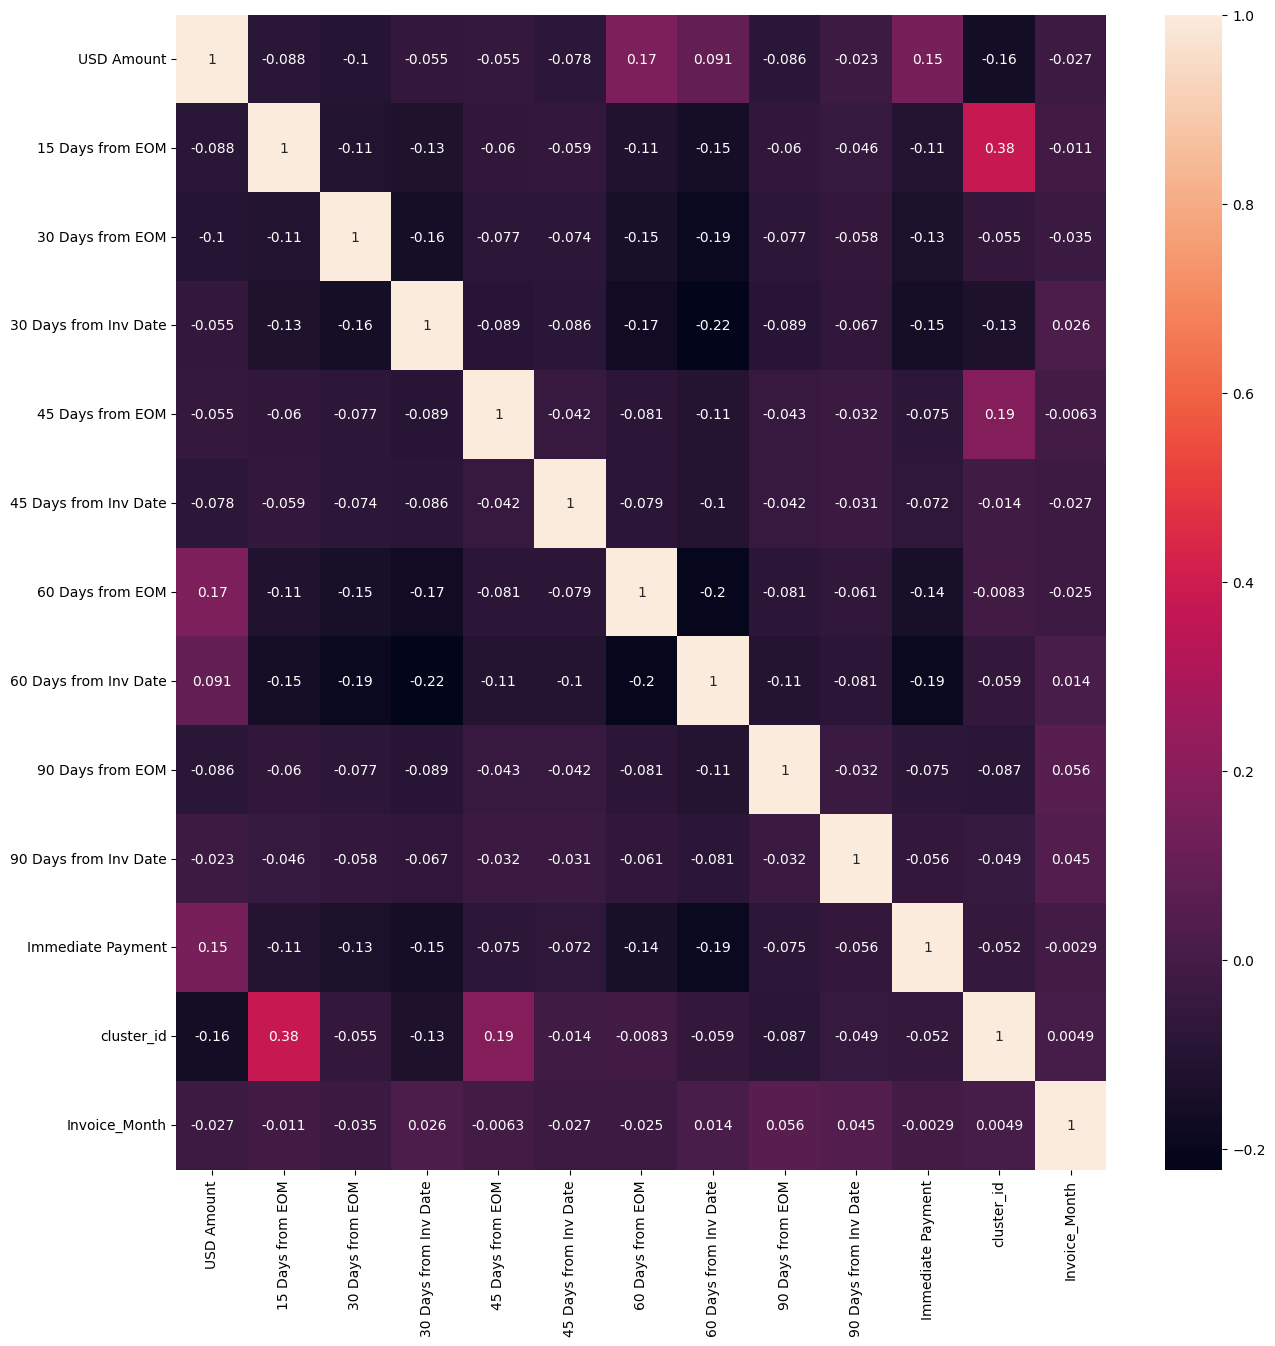

In [250]:
# Plotting heat map of X_train dataset again
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(), annot=True)
plt.show()

Now the data has no high multicollinearity. Going ahead with model building

### Model Building

#### Logistic Regression

In [254]:
# Importing required library for building logistic regression model
import statsmodels.api as sm

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from statsmodels.tools.tools import add_constant

### 1st Model

In [256]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               late_pay   No. Observations:                65753
Model:                            GLM   Df Residuals:                    65739
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -30434.
Date:                Mon, 11 Nov 2024   Deviance:                       60868.
Time:                        00:38:27   Pearson chi2:                 6.38e+04
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3014
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0246      0.055      0.449      0.654      -0.083       0.132
USD Amount               -0.0503      0.012     -4.240      0.000      -0.074      -0.027
15 Days from EOM          2.4265      0.104     23.434      0.000       2.224       2.629
30 Days from EOM         -2.2821      0.052    -43.751      0.000      -2.384      -2.180
30 Days from Inv Date     0.3062      0.051      5.995      0.000       0.206       0.406
45 Days from EOM          0.3369      0.069      4.872      0.000       0.201       0.472
45 Days from Inv Date    -0.2625      0.062     -4.230      0.000      -0.384      -0.141
60 Days from EOM         -2.1265      0.052    -40.898      0.000      -2.228      -2.025
60 Days from Inv Date    -0.1493      0.049     -3.046      0.002      -0.245      -0.053
90 Days from EOM         -0.4493      0.061     -7.359      0.000      -0.569      -0.330
90 Days from Inv Date    -0.9279      0.069    -13.491      0.000      -1.063      -0.793
Immediate Payment         3.1177      0.101     30.754      0.000       2.919       3.316
cluster_id                0.4409      0.025     17.300      0.000       0.391       0.491
Invoice_Month             0.0959      0.003     38.046      0.000       0.091       0.101
=========================================================================================
"""

#### Checking VIF

In [258]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,cluster_id,8.54
12,Invoice_Month,2.72
7,60 Days from Inv Date,2.69
1,15 Days from EOM,2.25
6,60 Days from EOM,2.17
3,30 Days from Inv Date,2.07
10,Immediate Payment,1.94
2,30 Days from EOM,1.87
4,45 Days from EOM,1.54
5,45 Days from Inv Date,1.29


##### p-value is in acceptable range for almost all variable but the VIF for cluster ID is high but for rest variablee they are in acceptable range for , Choosing this model.

In [260]:
# Predicted values for train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5958     0.465365
92965    0.875370
85159    0.870683
71124    0.168465
8032     0.864698
31372    0.704727
93458    0.276076
75669    0.850549
79241    0.212653
56248    0.180421
dtype: float64

In [261]:
# Reshaping the array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.46536477, 0.87536997, 0.87068327, 0.16846491, 0.86469804,
       0.70472743, 0.27607591, 0.85054941, 0.21265257, 0.18042125])

In [262]:
# Creating a dataframe for predicted values
y_pred = pd.DataFrame({'late_pay':y_train.values, 'late_pred':y_train_pred})
y_pred.head()

,late_pay,late_pred
0,1,0.465365
1,1,0.875370
2,1,0.870683
3,0,0.168465
4,1,0.864698


In [263]:
# Making the prediction based on 0.5 cutoff
y_pred['logreg_pred'] = y_pred['late_pred'].map(lambda x:1 if x>0.5 else 0) 
y_pred.head()

,late_pay,late_pred,logreg_pred
0,1,0.465365,0
1,1,0.875370,1
2,1,0.870683,1
3,0,0.168465,0
4,1,0.864698,1


In [264]:
# Confusion Matrix
confusion = confusion_matrix(y_pred.late_pay, y_pred.logreg_pred)
confusion

array([[12835,  9634],
       [ 4477, 38807]], dtype=int64)

In [265]:
# Accuracy
print(accuracy_score(y_pred.late_pay, y_pred.logreg_pred))

0.7853938223351026


##### We have 78.5% accuracy for our train data set.

In [267]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [268]:
# Let's see the sensitivity of our logistic regression model
sensitivity = TP / float(TP+FN)
sensitivity

0.8965668607337585

In [269]:
# Let us calculate specificity
specificity = TN / float(TN+FP)
specificity

0.5712314744759447

In [270]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.42876852552405537


In [271]:
# positive predictive value 
print (TP / float(TP+FP))

0.8011188868933342


In [272]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7413932532347505


#### Checking the optimal cutoff point

In [274]:
# Trying out multiple threshold values
for i in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
    y_pred[f'y_pred_{i}'] = y_pred['late_pred'].apply(lambda x : 1 if x > i else 0)
y_pred

,late_pay,late_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9
0,1,0.465365,0,1,1,1,1,0,0,0,0,0
1,1,0.875370,1,1,1,1,1,1,1,1,1,0
2,1,0.870683,1,1,1,1,1,1,1,1,1,0
3,0,0.168465,0,1,0,0,0,0,0,0,0,0
4,1,0.864698,1,1,1,1,1,1,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
65748,1,0.755180,1,1,1,1,1,1,1,1,0,0
65749,0,0.730328,1,1,1,1,1,1,1,1,0,0
65750,0,0.218264,0,1,1,0,0,0,0,0,0,0
65751,1,0.910462,1,1,1,1,1,1,1,1,1,1


In [275]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_pred.late_pay, y_pred[f'y_pred_{i}'])
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.658282  1.000000  0.000000
0.2   0.2  0.729944  0.976019  0.255908
0.3   0.3  0.769623  0.949242  0.423606
0.4   0.4  0.784892  0.914888  0.534470
0.5   0.5  0.785394  0.896567  0.571231
0.6   0.6  0.771934  0.860041  0.602207
0.7   0.7  0.731723  0.714929  0.764075
0.8   0.8  0.653871  0.508987  0.932974
0.9   0.9  0.539017  0.306025  0.987850


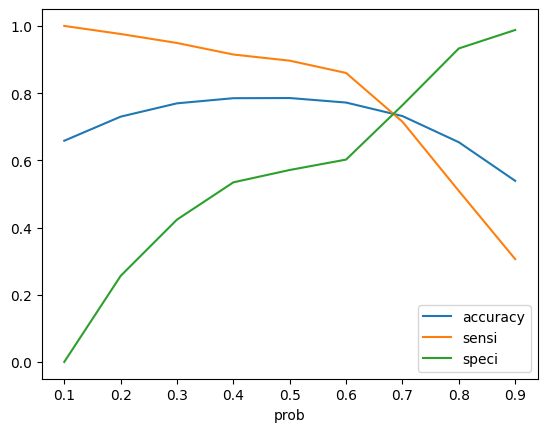

In [276]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.6 is the optimum point to take it as a cutoff probability.

In [278]:
# Creating a column based on 0.6 cutoff for prediction
y_pred['final_predicted'] = y_pred.late_pred.map( lambda x: 1 if x > 0.6 else 0)

y_pred.head()

,late_pay,late_pred,logreg_pred,y_pred_0.1,y_pred_0.2,y_pred_0.3,y_pred_0.4,y_pred_0.5,y_pred_0.6,y_pred_0.7,y_pred_0.8,y_pred_0.9,final_predicted
0,1,0.465365,0,1,1,1,1,0,0,0,0,0,0
1,1,0.875370,1,1,1,1,1,1,1,1,1,0,1
2,1,0.870683,1,1,1,1,1,1,1,1,1,0,1
3,0,0.168465,0,1,0,0,0,0,0,0,0,0,0
4,1,0.864698,1,1,1,1,1,1,1,1,1,0,1


In [279]:
# Let's check the overall accuracy.
accuracy_score(y_pred.late_pay, y_pred.final_predicted)

0.771934360409411

In [280]:
# Precision Score
precision_score(y_pred.late_pay, y_pred.final_predicted)

0.806385928429079

In [281]:
# Recall Score
recall_score(y_pred.late_pay, y_pred.final_predicted)

0.86004066167637

In [282]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_pred.late_pay, y_pred.late_pred)

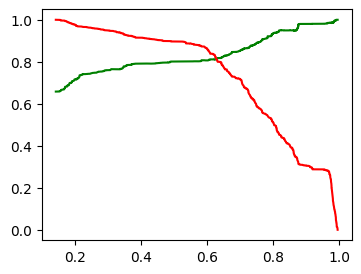

In [283]:
plt.figure(figsize=(4,3))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

On Precision & Recall trade off we found optimal cutoff of between 0.6 & 0.7 . Hence keeping the optimal cutoff 0.6.

### Plotting the ROC curve


In [286]:
from sklearn.metrics import roc_auc_score,roc_curve

In [287]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

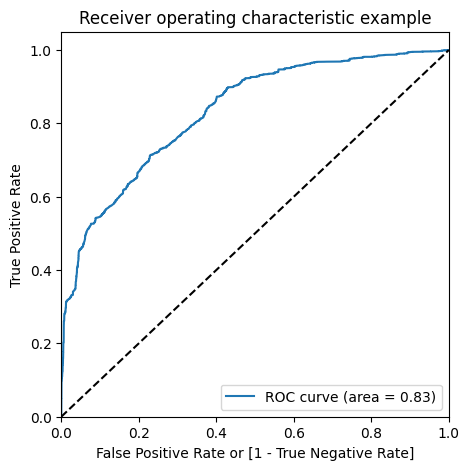

In [288]:
fpr, tpr, thresholds = roc_curve(y_pred.late_pay,y_pred.late_pred,drop_intermediate = False)
draw_roc(y_pred.late_pay,y_pred.late_pred)

AUC = 0.83 which shows the model is good.

#### Now, moving towards Test Set and making predictions on the test set

In [291]:
# Transforming the numerical column of test set
X_test[['USD Amount']]= scaler.transform(X_test[['USD Amount']])
X_test.head()

,USD Amount,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,cluster_id,Invoice_Month
16670,-0.560627,0,0,0,0,0,0,1,0,0,0,1,2
17617,-0.504749,0,0,0,0,0,0,0,0,0,1,1,1
31329,-0.044582,0,0,1,0,0,0,0,0,0,0,1,1
65058,-0.293636,0,0,0,0,0,0,1,0,0,0,2,1
81458,-0.555510,0,0,0,0,0,0,0,1,0,0,1,8


In [292]:
# Adding a constant
X_test_sm = sm.add_constant(X_test)

In [293]:
# Making predictions on the test set

y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

16670    0.630947
17617    0.975980
31329    0.704727
65058    0.704290
81458    0.692404
33636    0.792557
58463    0.211528
41595    0.810478
81684    0.731534
74360    0.207681
dtype: float64

In [294]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [295]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [296]:
# Putting CustID to index
y_test_df['CustID'] = y_test_df.index

In [297]:
y_test_df.head()

,late_pay,CustID
16670,0,16670
17617,1,17617
31329,1,31329
65058,0,65058
81458,1,81458


In [298]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [299]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [300]:
y_pred_final.head()

,late_pay,CustID,0
0,0,16670,0.630947
1,1,17617,0.975980
2,1,31329,0.704727
3,0,65058,0.704290
4,1,81458,0.692404


In [301]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Delay_Prob','target':'Delay'})

In [302]:
# Let's see the head of y_pred_final
y_pred_final.head()

,late_pay,CustID,Delay_Prob
0,0,16670,0.630947
1,1,17617,0.975980
2,1,31329,0.704727
3,0,65058,0.704290
4,1,81458,0.692404


In [303]:
# Creating final prediction on test set based on 0.6 cutoff
y_pred_final['final_predicted'] = y_pred_final.Delay_Prob.map(lambda x: 1 if x >= 0.6 else 0)

In [304]:
y_pred_final.head()

,late_pay,CustID,Delay_Prob,final_predicted
0,0,16670,0.630947,1
1,1,17617,0.975980,1
2,1,31329,0.704727,1
3,0,65058,0.704290,1
4,1,81458,0.692404,1


In [305]:
# Let's check the overall accuracy.
accuracy_score(y_pred_final.late_pay, y_pred_final.final_predicted)

0.7759403832505323

In [306]:
#precision score
precision_score(y_pred_final.late_pay, y_pred_final.final_predicted)

0.8119895129575476

In [307]:
# Recall Score
recall_score(y_pred.late_pay, y_pred.final_predicted)

0.86004066167637

#### Our train and test accuracy is almost same around 77.7 %

### Random Forest

In [310]:
# importing necessary libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, GridSearchCV

In [311]:
df1.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

In [312]:
# creating X and y
X= df1
y= merged_df['late_pay']

In [313]:
# Splitting into train and test set
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3, random_state=42)

In [314]:
# Building a base random forest model to check the accuracy

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_rf, y_train_rf)

RandomForestClassifier(random_state=42)

In [315]:
# predicted values
y_train_pred_rf = rf.predict(X_train_rf)

In [316]:
# Checking accuracy and classification report
accuracy = accuracy_score(y_train_rf, y_train_pred_rf)
print(classification_report(y_train_rf, y_train_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22469
           1       0.95      0.98      0.97     43284

    accuracy                           0.96     65753
   macro avg       0.96      0.95      0.95     65753
weighted avg       0.96      0.96      0.96     65753

Accuracy is :  0.9575228506684106


In [317]:
# Using cross validation to check if our model is overfitting

rf_cv = RandomForestClassifier(random_state=42)

# Compute cross-validation scores on the training data
scores = cross_val_score(rf_cv, X_train_rf, y_train_rf, cv=5, scoring= 'recall')

# Compute the mean and standard deviation of the cross-validation scores
mean_score = scores.mean()
std_score = scores.std()

# Print the mean and standard deviation of the cross-validation scores
print("Mean score:", mean_score)
print("Standard deviation:", std_score)

Mean score: 0.9537933813351177
Standard deviation: 0.004486546813652333


In [318]:
# Creating y_pred for test data
y_test_pred_rf = rf.predict(X_test_rf)

In [319]:
# Checking accuracy and classification report of test data
accuracy = accuracy_score(y_test_rf, y_test_pred_rf)
print(classification_report(y_test_rf, y_test_pred_rf))
print("Accuracy is : ", accuracy)

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9490
           1       0.93      0.96      0.94     18690

    accuracy                           0.92     28180
   macro avg       0.92      0.91      0.91     28180
weighted avg       0.92      0.92      0.92     28180

Accuracy is :  0.9223917672107877


#### Hyperparameter Tuning

In [321]:
#Using Grid search for hyper-parameter tuning
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 20,30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(rf, param_grid=param_grid, scoring='f1', cv=5, n_jobs= -1)

grid_search.fit(X_train_rf, y_train_rf)

# Best Hyperparameters
print("Best hyperparameters:", grid_search.best_params_)
print("Best f1 score:", grid_search.best_score_)

best_rf = grid_search.best_estimator_
y_pred_cv_rf = best_rf.predict(X_train_rf)

print(classification_report(y_train_rf, y_pred_cv_rf))

Best hyperparameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best f1 score: 0.9389846480412654
              precision    recall  f1-score   support

           0       0.97      0.91      0.94     22469
           1       0.95      0.98      0.97     43284

    accuracy                           0.96     65753
   macro avg       0.96      0.95      0.95     65753
weighted avg       0.96      0.96      0.96     65753



In [322]:
# Test set (testing)

y_pred_test_cv = best_rf.predict(X_test_rf)

print(classification_report(y_test_rf,y_pred_test_cv))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88      9490
           1       0.93      0.96      0.94     18690

    accuracy                           0.92     28180
   macro avg       0.92      0.91      0.91     28180
weighted avg       0.92      0.92      0.92     28180



From the above classification report, it can be seen that the f1-score for train and test set is 0.97 and 0.96, which implies that this is a good model. Hence moving forward with this as final model for prediction.

### Checking feature importance

In [325]:
importance = best_rf.feature_importances_
sorted_idx = importance.argsort()[::-1]

# Print the feature ranking
print("Feature ranking:")
for i, idx in enumerate(sorted_idx):
    print(f"{i+1}. {X.columns[idx]} ({importance[idx]:.3f})")

Feature ranking:
1. USD Amount (0.489)
2. Invoice_Month (0.131)
3. 30 Days from EOM (0.112)
4. 60 Days from EOM (0.111)
5. Immediate Payment (0.043)
6. 15 Days from EOM (0.028)
7. cluster_id (0.027)
8. 60 Days from Inv Date (0.012)
9. 30 Days from Inv Date (0.012)
10. INV (0.008)
11. 90 Days from EOM (0.007)
12. 90 Days from Inv Date (0.007)
13. 45 Days from EOM (0.005)
14. 45 Days from Inv Date (0.004)
15. CM (0.004)
16. DM (0.001)


### Data Preparation of Open Invoice dataset for prediction : 

The open invoice data has a column 'AGE' which is calculated by taking the difference between Transaction Date and AS_OF_DATE. A positive value in the AGE column clearly indicates that the payment is already overdue. So, there is nothing to predict. But, a negative value in the AGE column means that the due date is yet to be crossed. Hence, the model should be able to predict whether the payment will be delayed or not only for those customers whose AGE value is negative.

In [327]:
# Selecting rows with negative age value for prediction
open_df_age = openinv_data[openinv_data['AGE'] < 0]
open_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM
2,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,False,True,0
4,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0
5,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0
6,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0
7,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0


In [329]:
open_df_age = pd.merge(open_df_age, merge_copy, how='left', on='Customer_Name')

In [331]:
# Null counts
round(open_df_age.isna().sum()/len(open_df_age.index), 4)

Customer_Name            0.0000
Due Date                 0.0000
AGE                      0.0000
USD Amount               0.0000
INV_CREATION_DATE        0.0000
15 Days from EOM         0.0000
30 Days from EOM         0.0000
30 Days from Inv Date    0.0000
45 Days from EOM         0.0000
45 Days from Inv Date    0.0000
60 Days from EOM         0.0000
60 Days from Inv Date    0.0000
90 Days from EOM         0.0000
90 Days from Inv Date    0.0000
Immediate Payment        0.0000
DM                       0.0000
INV                      0.0000
CM                       0.0000
cluster_id               0.0274
dtype: float64

cluster_id has 2.7 % null value counts, hence removing the null values for better model prediction as these null values are of new customers whose data is not present in the 'Received Payment data'.

In [335]:
# Dropping the rows containing null values
open_df_age.dropna(axis=0, inplace=True)

In [337]:
open_df_age.shape

(27247, 19)

In [339]:
open_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,False,True,0,1.0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1.0
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1.0
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1.0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1.0


In [341]:
open_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int64         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  int64         
 6   30 Days from EOM       27247 non-null  int64         
 7   30 Days from Inv Date  27247 non-null  int64         
 8   45 Days from EOM       27247 non-null  int64         
 9   45 Days from Inv Date  27247 non-null  int64         
 10  60 Days from EOM       27247 non-null  int64         
 11  60 Days from Inv Date  27247 non-null  int64         
 12  90 Days from EOM       27247 non-null  int64         
 13  90 Day

In [343]:
# converting the cluster_id column to int
open_df_age['cluster_id'] = open_df_age['cluster_id'].astype('Int64')

In [351]:
# Checking after adding 'cluster_id' column
open_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,False,True,0,1
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1


In [353]:
# Creating a copy of open_reg_df_age for final prediction
open_df_final = open_df_age.copy()

In [355]:
# Dropping Customer_Name and AGE column
open_df_final.drop(['Customer_Name', 'AGE'], axis=1, inplace=True)

In [357]:
open_df_final['Invoice_Month'] = open_df_final['INV_CREATION_DATE'].dt.month # Extracting Month

In [359]:
# dropping due_date and invoice creation date

open_df_final.drop(['Due Date','INV_CREATION_DATE'], axis= 1, inplace= True)

In [361]:
# Checking the columns in the dataset
open_df_final.columns

Index(['USD Amount', '15 Days from EOM', '30 Days from EOM',
       '30 Days from Inv Date', '45 Days from EOM', '45 Days from Inv Date',
       '60 Days from EOM', '60 Days from Inv Date', '90 Days from EOM',
       '90 Days from Inv Date', 'Immediate Payment', 'DM', 'INV', 'CM',
       'cluster_id', 'Invoice_Month'],
      dtype='object')

## Final Prediction based on Random Forest model

In [364]:
# getting predictions on open invoices

y_openinv= best_rf.predict_proba(open_df_final)[:,1]

y_openinv

array([0.47248465, 0.87347222, 0.83718712, ..., 0.96444444, 0.97332011,
       0.84333333])

In [366]:
# Adding the predicted values to the dataframe
open_df_age['Pred_rf'] = y_openinv
open_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,60 Days from EOM,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,0,0,0,0,0,False,True,0,1,0.472485
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1,0.873472
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1,0.837187
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1,0.013333
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,0,0,0,0,0,False,True,0,1,1.000000


In [370]:
open_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27247 entries, 0 to 28014
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Customer_Name          27247 non-null  object        
 1   Due Date               27247 non-null  datetime64[ns]
 2   AGE                    27247 non-null  int64         
 3   USD Amount             27247 non-null  int64         
 4   INV_CREATION_DATE      27247 non-null  datetime64[ns]
 5   15 Days from EOM       27247 non-null  int64         
 6   30 Days from EOM       27247 non-null  int64         
 7   30 Days from Inv Date  27247 non-null  int64         
 8   45 Days from EOM       27247 non-null  int64         
 9   45 Days from Inv Date  27247 non-null  int64         
 10  60 Days from EOM       27247 non-null  int64         
 11  60 Days from Inv Date  27247 non-null  int64         
 12  90 Days from EOM       27247 non-null  int64         
 13  90 Day

In [376]:
# Customer-wise model prediction
cust_seg_prob= pd.DataFrame((open_df_age.select_dtypes(exclude=['datetime'])).groupby('Customer_Name').prod()['Pred_rf'].round(4))
cust_seg_prob

,Pred_rf
Customer_Name,
3D D Corp,0.0000
6TH Corp,0.2252
ABDU Corp,0.0000
ABEE Corp,0.8220
ABU Corp,0.0020
...,...
XPRE Corp,0.0000
YOUG Corp,0.3422
YOUS Corp,0.0000


In [378]:
# Taking 0.6 as cut off value
open_df_age['Final_Prediction'] = open_df_age.Pred_rf.map(lambda x: 1 if x>0.6 else 0)

In [380]:
# Let us check our final dataframe with predictions
open_df_age.head()

,Customer_Name,Due Date,AGE,USD Amount,INV_CREATION_DATE,15 Days from EOM,30 Days from EOM,30 Days from Inv Date,45 Days from EOM,45 Days from Inv Date,...,60 Days from Inv Date,90 Days from EOM,90 Days from Inv Date,Immediate Payment,DM,INV,CM,cluster_id,Pred_rf,Final_Prediction
0,AL J Corp,2022-04-23,-18,2000,2022-03-24 17:46:00,0,0,1,0,0,...,0,0,0,0,False,True,0,1,0.472485,0
1,ALLI Corp,2022-04-30,-25,3800,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,False,True,0,1,0.873472,1
2,ALLI Corp,2022-04-30,-25,1264,2022-03-03 22:30:00,0,1,0,0,0,...,0,0,0,0,False,True,0,1,0.837187,1
3,ALLI Corp,2022-04-30,-25,25858,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,False,True,0,1,0.013333,0
4,ALLI Corp,2022-04-30,-25,39873,2022-03-15 19:06:00,0,1,0,0,0,...,0,0,0,0,False,True,0,1,1.000000,1


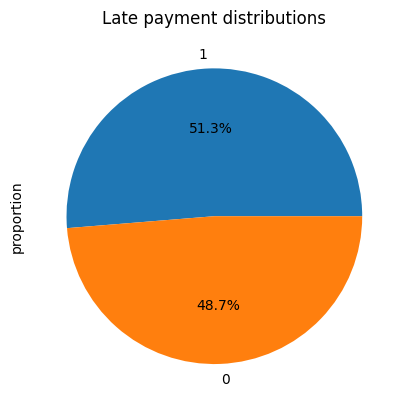

In [382]:
(open_df_age.Final_Prediction.value_counts(normalize = True)*100).plot.pie(autopct='%1.1f%%')
plt.title("Late payment distributions")
plt.show()

Looking at the chart, we can observe that 51.3% payments in the open invoice data with AGE value negative(indicating due date not crossed)

## Summary of prediction on Customers_name

In [386]:
# Checking Customers with our target variable_delayed
Delay_payment = open_df_age.groupby(['Customer_Name'])['Final_Prediction'].sum()
Delay_payment = Delay_payment.to_frame()
Delay_payment = Delay_payment.sort_values(by ='Final_Prediction',ascending=False)

In [388]:
# Checking Customers for total invoice counts
Delay_payment_total = open_df_age.groupby(['Customer_Name'])['Final_Prediction'].count() # total payments by each customers
Delay_payment_total = Delay_payment_total.to_frame()
Delay_payment_total = Delay_payment_total.sort_values(by ='Final_Prediction',ascending=False)

In [390]:
# Merging both dataframes based on Customer_name
Merge_df=pd.merge(Delay_payment,Delay_payment_total,how='inner',on='Customer_Name')

In [398]:
# Renaming the columns
Merge_df.columns=["Delayed_Payment","Total_Payments"]

In [400]:
# Creating a column for delay percentage of each customers
Merge_df['Delay%']=np.round(Merge_df['Delayed_Payment']/Merge_df['Total_Payments']*100,2)

In [402]:
# Checking Merge_df 
Merge_df.sort_values('Total_Payments',ascending=False)

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
SEPH Corp,4392,8260,53.17
FITR Corp,1553,3454,44.96
PARF Corp,1025,1717,59.70
AREE Corp,715,1117,64.01
ALLI Corp,367,1042,35.22
...,...,...,...
KING Corp,1,1,100.00
EREV Corp,1,1,100.00
SAME Corp,1,1,100.00


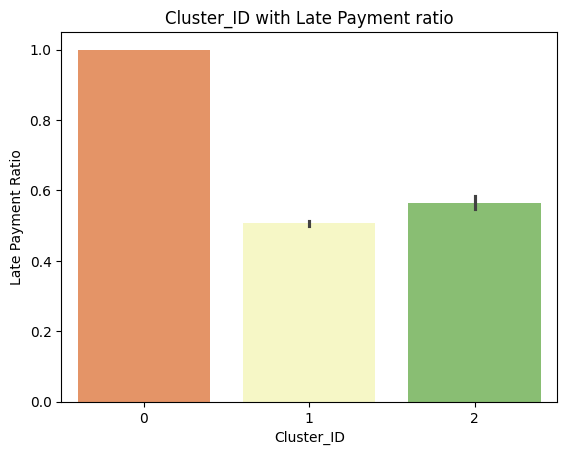

In [406]:
sns.barplot(data=open_df_age, x='cluster_id', y='Final_Prediction', estimator=np.mean, palette='RdYlGn')
plt.title("Cluster_ID with Late Payment ratio")
plt.xlabel("Cluster_ID")
plt.ylabel("Late Payment Ratio")
plt.show()
#cluster ID 1 has significantly higher ratio of default than clusters 0 and 2

In [408]:
Merge_df.sort_values(['Delay%','Total_Payments','Delayed_Payment'],ascending=[False,False,False]).head(10) # top 10 customers with highest delay rates

,Delayed_Payment,Total_Payments,Delay%
Customer_Name,,,
FORE Corp,8,8,100.0
ALSU Corp,7,7,100.0
LVMH Corp,4,4,100.0
SUND Corp,4,4,100.0
TRAF Corp,3,3,100.0
ROVE Corp,3,3,100.0
MAYC Corp,3,3,100.0
MUOS Corp,3,3,100.0
CITY Corp,3,3,100.0


## Recommendations based on the derived insights:

- Currency used for bill payments are mostly USD, SAR or AED.
-  - Credit Note Payments observe the greatest delay rate compared to Debit Note or Invoice type invoice classes, hence company policies on payment collec- tion could be made stricter around such invoice classes
 - Goods type invoices had significantly greater
- Customers were clustered into three segments: 0 (medium payment duration), 1 (early), and 2 (Late Payment). Cluster 2 customers, with the longest delay rates, should receive heightened attention.  -payment delay rates than non-goods types and hence can be subjected to stricter payment policies 
 - Since lower value payments comprise of the majority of the transactions, also late payments are seen more on lower value paymentsa- s to be last resort 
 - Customer segments were clustered into three categories, viz., 0,1 and 2 which mean medium, prolonged and eagreatest probability and total & delayed payment counts should be first priority and should be focused on more due to such high probability rates